# Pre-Processing

### Load the required libraries and packages to your working environment

In [ ]:
#load in the data
import sys
from google.colab import drive

## Import required packages for data manipulation and visualization, and curve fitting

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from sklearn import metrics
from sklearn.svm import SVR, SVC
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


### Collect data from various sources relevant to your task

In [ ]:


# CustomerChurn = pd.read_csv('/content/drive/MyDrive/Capstone/ICR - Identifying Age-Related Conditions/data/train.csv', index_col='Id')
Telco_customer_churn_status = pd.read_excel('/content/drive/MyDrive/Capstone/Churn and Causal Analysis/Telecommunications_Industry/Telco_customer_churn_status.xlsx', index_col='Customer ID')
Telco_customer_churn_location = pd.read_excel('/content/drive/MyDrive/Capstone/Churn and Causal Analysis/Telecommunications_Industry/Telco_customer_churn_location.xlsx', index_col='Customer ID')
Telco_customer_churn_services = pd.read_excel('/content/drive/MyDrive/Capstone/Churn and Causal Analysis/Telecommunications_Industry/Telco_customer_churn_services.xlsx', index_col='Customer ID')
Telco_customer_churn_population = pd.read_excel('/content/drive/MyDrive/Capstone/Churn and Causal Analysis/Telecommunications_Industry/Telco_customer_churn_population.xlsx', index_col='ID')
Telco_customer_churn_demographics = pd.read_excel('/content/drive/MyDrive/Capstone/Churn and Causal Analysis/Telecommunications_Industry/Telco_customer_churn_demographics.xlsx', index_col='Customer ID')

In [ ]:
df_all = pd.merge(Telco_customer_churn_status, Telco_customer_churn_location, how = 'left', on = 'Customer ID')
df_all = pd.merge(df_all, Telco_customer_churn_services, how = 'left', on = 'Customer ID')
df_all = pd.merge(df_all, Telco_customer_churn_demographics, how = 'left', on = 'Customer ID')

df_all = df_all.drop(columns = ['Count_x', 'Count_y', 'Quarter_x', 'Quarter_y'])

<ipython-input-4-d115ba468ff6>:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Count_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_all = pd.merge(df_all, Telco_customer_churn_demographics, how = 'left', on = 'Customer ID')


# EDA

In [ ]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 8779-QRDMV to 3186-AJIEK
Data columns (total 52 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Status ID                          7043 non-null   object 
 1   Satisfaction Score                 7043 non-null   int64  
 2   Customer Status                    7043 non-null   object 
 3   Churn Label                        7043 non-null   object 
 4   Churn Value                        7043 non-null   int64  
 5   Churn Score                        7043 non-null   int64  
 6   CLTV                               7043 non-null   int64  
 7   Churn Category                     1869 non-null   object 
 8   Churn Reason                       1869 non-null   object 
 9   Location ID                        7043 non-null   object 
 10  Country                            7043 non-null   object 
 11  State                              7043 non-nu

In [ ]:
df_all.head()

Status ID  Satisfaction Score Customer Status Churn Label  \
Customer ID                                                               
8779-QRDMV   SWSORB1252                   3         Churned         Yes   
7495-OOKFY   SNAEQA8572                   3         Churned         Yes   
1658-BYGOY   LMBQNN3714                   2         Churned         Yes   
4598-XLKNJ   VRZYZI9978                   2         Churned         Yes   
4846-WHAFZ   FDNAKX1688                   2         Churned         Yes   

             Churn Value  Churn Score  CLTV   Churn Category  \
Customer ID                                                    
8779-QRDMV             1           91  5433       Competitor   
7495-OOKFY             1           69  5302       Competitor   
1658-BYGOY             1           81  3179       Competitor   
4598-XLKNJ             1           88  5337  Dissatisfaction   
4846-WHAFZ             1           67  2793            Price   

                             Churn Reason Location ID  ...  \
Customer ID                                            ...   
8779-QRDMV   Competitor offered more data  OXCZEW7397  ...   
7495-OOKFY   Competitor made better offer  FCCECI8494  ...   
1658-BYGOY   Competitor made better offer  HEHUQY7254  ...   
4598-XLKNJ      Limited range of services  WIUHRF2613  ...   
4846-WHAFZ             Extra data charges  CFEZBF4415  ...   

            Total Extra Data Charges Total Long Distance Charges  \
Customer ID                                                        
8779-QRDMV                        20                        0.00   
7495-OOKFY                         0                      390.80   
1658-BYGOY                         0                      203.94   
4598-XLKNJ                         0                      494.00   
4846-WHAFZ                         0                      234.21   

            Total Revenue  Gender Age  Under 30  Senior Citizen Married  \
Customer ID                                                               
8779-QRDMV          59.65    Male  78        No             Yes      No   
7495-OOKFY        1024.10  Female  74        No             Yes     Yes   
1658-BYGOY        1910.88    Male  71        No             Yes      No   
4598-XLKNJ        2995.07  Female  78        No             Yes     Yes   
4846-WHAFZ        3102.36  Female  80        No             Yes     Yes   

            Dependents  Number of Dependents  
Customer ID                                   
8779-QRDMV          No                     0  
7495-OOKFY         Yes                     1  
1658-BYGOY         Yes                     3  
4598-XLKNJ         Yes                     1  
4846-WHAFZ         Yes                     1  

[5 rows x 52 columns]

Need to One hot Encode the following
* Offer
* Internet Type
* Contract
* Payment Method

Change to Boolean (1 or 0 instead of No or Yes)
* Referred a Friend
* Phone Service
* Multiple Lines
* Internet Service
* Online Security
* Online Backup
* Device Protection Plan
* Premium Tech Support
* Streaming TV
* Streaming Movies
* Streaming Music
* Unlimited Data
* Paperless Billing
* Gender (Make 1 Female, 0 Male)
* Under 30
* Senior Citizen
* Married
* Dependents


In [ ]:
def one_hot_encode_feature(df, col):
  """
  Given dataframe df performs one hot encoding on categorical feature col
  """
  encoded_feature = pd.get_dummies(df[col], prefix=f'{col}')
  df.drop([col], axis=1, inplace=True)
  df = df.join(encoded_feature)

  return df

In [ ]:
def replace_values(df, col, old_values = ['Yes', 'No'], new_values = [1,0]):
  "Given a dataframe df and column col, replace old values with new values"
  df[col] = df[col].replace(old_values, new_values)

  return df

In [ ]:
OHE_list = ['Offer','Internet Type','Contract','Payment Method']

for col in OHE_list:
  df_all = one_hot_encode_feature(df_all, col)

In [ ]:
boolean_list = ['Referred a Friend','Phone Service','Multiple Lines','Internet Service','Online Security', 'Online Backup',
                'Device Protection Plan','Premium Tech Support','Streaming TV','Streaming Movies','Streaming Music',
                'Unlimited Data','Paperless Billing','Gender', #(Make 1 Female, 0 Male)
                'Under 30','Senior Citizen','Married','Dependents']

for col in boolean_list:
  if col == 'Gender':
    df_all = replace_values(df_all, col, ['Female', 'Male'], [1,0])
  df_all = replace_values(df_all, col)

In [ ]:
# df_test.to_csv('/content/drive/MyDrive/Capstone/Churn and Causal Analysis/df_test.csv')

In [ ]:
df_all.head()

Status ID  Satisfaction Score Customer Status Churn Label  \
Customer ID                                                               
8779-QRDMV   SWSORB1252                   3         Churned         Yes   
7495-OOKFY   SNAEQA8572                   3         Churned         Yes   
1658-BYGOY   LMBQNN3714                   2         Churned         Yes   
4598-XLKNJ   VRZYZI9978                   2         Churned         Yes   
4846-WHAFZ   FDNAKX1688                   2         Churned         Yes   

             Churn Value  Churn Score  CLTV   Churn Category  \
Customer ID                                                    
8779-QRDMV             1           91  5433       Competitor   
7495-OOKFY             1           69  5302       Competitor   
1658-BYGOY             1           81  3179       Competitor   
4598-XLKNJ             1           88  5337  Dissatisfaction   
4846-WHAFZ             1           67  2793            Price   

                             Churn Reason Location ID  ...  \
Customer ID                                            ...   
8779-QRDMV   Competitor offered more data  OXCZEW7397  ...   
7495-OOKFY   Competitor made better offer  FCCECI8494  ...   
1658-BYGOY   Competitor made better offer  HEHUQY7254  ...   
4598-XLKNJ      Limited range of services  WIUHRF2613  ...   
4846-WHAFZ             Extra data charges  CFEZBF4415  ...   

            Internet Type_Cable Internet Type_DSL Internet Type_Fiber Optic  \
Customer ID                                                                   
8779-QRDMV                    0                 1                         0   
7495-OOKFY                    0                 0                         1   
1658-BYGOY                    0                 0                         1   
4598-XLKNJ                    0                 0                         1   
4846-WHAFZ                    0                 0                         1   

             Internet Type_None Contract_Month-to-Month  Contract_One Year  \
Customer ID                                                                  
8779-QRDMV                    0                       1                  0   
7495-OOKFY                    0                       1                  0   
1658-BYGOY                    0                       1                  0   
4598-XLKNJ                    0                       1                  0   
4846-WHAFZ                    0                       1                  0   

             Contract_Two Year Payment Method_Bank Withdrawal  \
Customer ID                                                     
8779-QRDMV                   0                              1   
7495-OOKFY                   0                              0   
1658-BYGOY                   0                              1   
4598-XLKNJ                   0                              1   
4846-WHAFZ                   0                              1   

             Payment Method_Credit Card  Payment Method_Mailed Check  
Customer ID                                                           
8779-QRDMV                            0                            0  
7495-OOKFY                            1                            0  
1658-BYGOY                            0                            0  
4598-XLKNJ                            0                            0  
4846-WHAFZ                            0                            0  

[5 rows x 64 columns]

In [ ]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 8779-QRDMV to 3186-AJIEK
Data columns (total 64 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Status ID                          7043 non-null   object 
 1   Satisfaction Score                 7043 non-null   int64  
 2   Customer Status                    7043 non-null   object 
 3   Churn Label                        7043 non-null   object 
 4   Churn Value                        7043 non-null   int64  
 5   Churn Score                        7043 non-null   int64  
 6   CLTV                               7043 non-null   int64  
 7   Churn Category                     1869 non-null   object 
 8   Churn Reason                       1869 non-null   object 
 9   Location ID                        7043 non-null   object 
 10  Country                            7043 non-null   object 
 11  State                              7043 non-nu

In [ ]:


X = df_all.drop(columns = ['Churn Score','Customer Status', 'Churn Label', 'Churn Value', 'Churn Category', 'Churn Reason', 'Country', 'State'])
X['Proportion_of_Monthly_Charges_to_Total_Charges'] = X['Monthly Charge']/X['Total Charges']
#Dropping location columns for now
X = X.drop(columns = ['Status ID', 'CLTV', 'Location ID', 'City', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude',
#Also dropping Dependents as it is akin to 'number of dependents', 'Under 30' and 'Senior Citizen' since it is related to age. Dropping
                      #Total revenue since it equal to ('Total Charges' - 'Total Refunds' + 'Total Extra Data Charges' + 'Total Long Distance Charges'
                      #Referred a friend is represented in 'referrals'
                      'Service ID', 'Dependents', 'Under 30', 'Senior Citizen', 'Total Revenue', 'Referred a Friend'])

y = df_all['Churn Value']

In [ ]:
#Final Dimension Count
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 8779-QRDMV to 3186-AJIEK
Data columns (total 43 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Satisfaction Score                              7043 non-null   int64  
 1   Number of Referrals                             7043 non-null   int64  
 2   Tenure in Months                                7043 non-null   int64  
 3   Phone Service                                   7043 non-null   int64  
 4   Avg Monthly Long Distance Charges               7043 non-null   float64
 5   Multiple Lines                                  7043 non-null   int64  
 6   Internet Service                                7043 non-null   int64  
 7   Avg Monthly GB Download                         7043 non-null   int64  
 8   Online Security                                 7043 non-null   int64  
 9   Online Backup                  

## Splitting data into train and test set

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state = 0)

## Explore the data set. Understand the data and the underlying interactions between the different variables. Use visualization tools to analyze the data.

## Multi-Collinearity

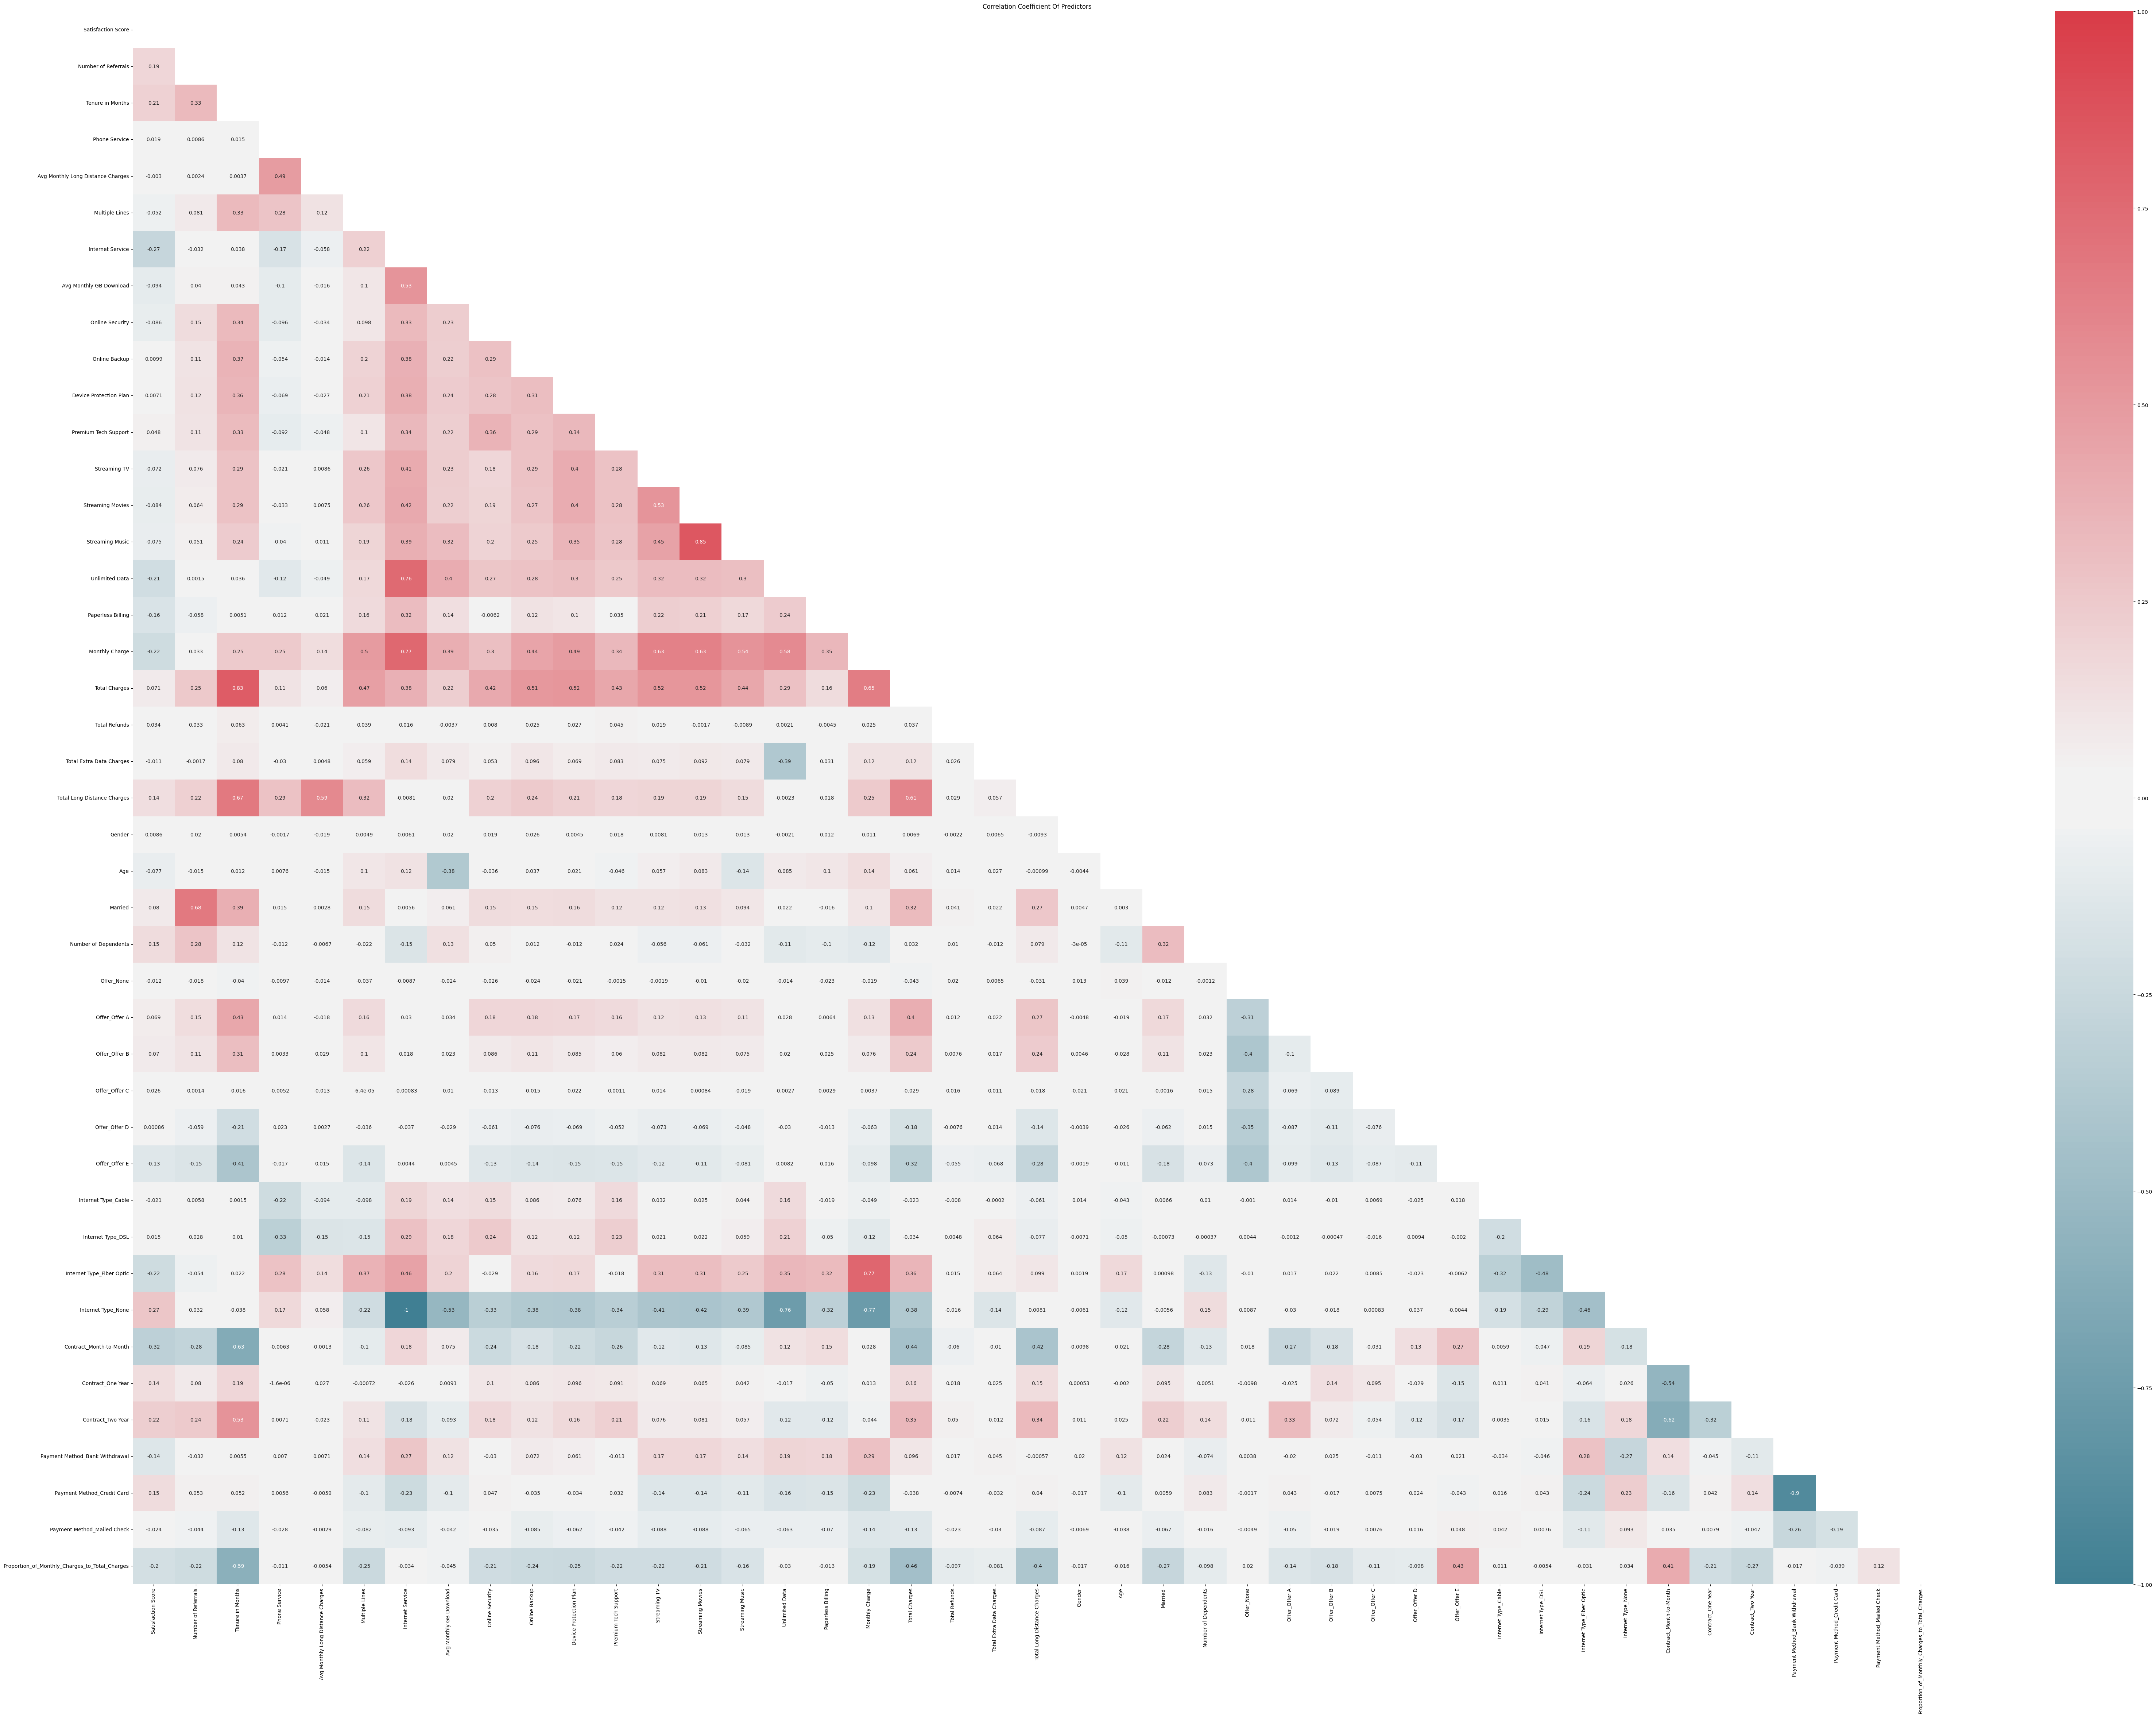

In [ ]:
#'remove manually at '.8' for removing collinearity

# import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# set figure size
plt.figure(figsize=(80,56))

#fig, ax = plt.subplots()
#Choosing a diverging color template:
#https://stackoverflow.com/questions/56536419/how-to-set-center-color-in-heatmap
rdbl = sns.diverging_palette(h_neg=220, h_pos=10, s=74, l=50, sep=10, as_cmap=True)

# Generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(X_train.corr(), dtype=bool))

# df_values_no_BQ_EL_na

# generate heatmap
sns.heatmap(X_train.corr(), cmap=rdbl, annot=True, mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Coefficient Of Predictors')

plt.savefig('correlation_map_most_variables.png', bbox_inches='tight', pad_inches=0.0)
plt.show()

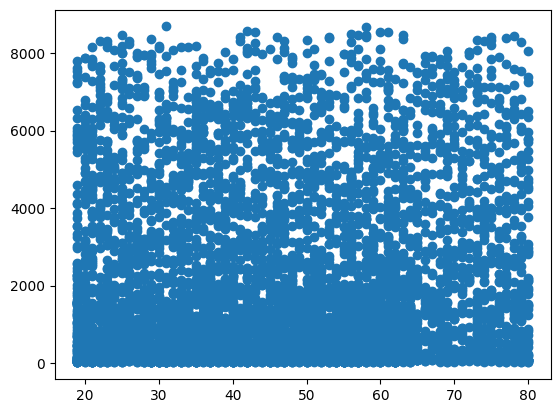

In [ ]:
plt.scatter(X_train['Age'], X_train['Total Charges'])

In [ ]:
# load statmodels functions
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# compute the vif for all given features


def compute_vif(df, features):

    X = df[features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1

    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [ ]:
compute_vif(X_train, X_train.columns).sort_values('VIF', ascending=False)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


Variable         VIF
34                       Internet Type_Fiber Optic         inf
27                                   Offer_Offer A         inf
40                      Payment Method_Credit Card         inf
39                  Payment Method_Bank Withdrawal         inf
38                               Contract_Two Year         inf
37                               Contract_One Year         inf
36                         Contract_Month-to-Month         inf
26                                      Offer_None         inf
28                                   Offer_Offer B         inf
35                              Internet Type_None         inf
29                                   Offer_Offer C         inf
6                                 Internet Service         inf
30                                   Offer_Offer D         inf
31                                   Offer_Offer E         inf
32                             Internet Type_Cable         inf
33                               Internet Type_DSL         inf
41                     Payment Method_Mailed Check         inf
17                                  Monthly Charge  145.185390
18                                   Total Charges   11.911801
2                                 Tenure in Months   10.760993
13                                Streaming Movies    8.931049
3                                    Phone Service    7.660369
15                                  Unlimited Data    5.732035
12                                    Streaming TV    5.530955
21                     Total Long Distance Charges    5.189041
14                                 Streaming Music    4.431842
4                Avg Monthly Long Distance Charges    3.166212
20                        Total Extra Data Charges    2.537827
5                                   Multiple Lines    2.531423
10                          Device Protection Plan    2.473965
9                                    Online Backup    2.313944
11                            Premium Tech Support    2.233806
8                                  Online Security    2.198039
24                                         Married    2.077967
7                          Avg Monthly GB Download    2.036607
42  Proportion_of_Monthly_Charges_to_Total_Charges    1.977627
1                              Number of Referrals    1.951076
23                                             Age    1.640068
0                               Satisfaction Score    1.301390
25                            Number of Dependents    1.244177
16                               Paperless Billing    1.208756
19                                   Total Refunds    1.018635
22                                          Gender    1.005015

## Columns to Drop and cleaning for VIF analysis

In [ ]:
#Dropping monthly charge as this can be calculated from total charges divided by tenure, with error being additional charges from long distance.

#Total charges is dropped since it remained high after removing monthly charge
X_train = X_train.drop(columns = ['Monthly Charge', 'Total Charges', 'Tenure in Months', 'Unlimited Data', 'Offer_None',
                                'Internet Type_None', 'Payment Method_Mailed Check', 'Contract_Two Year', 'Internet Service'])


#Tenure in months and unlimited data still remained above 5, Will drop each one successively to see new VIF

X_test = X_test.drop(columns = ['Monthly Charge', 'Total Charges', 'Tenure in Months', 'Unlimited Data', 'Offer_None',
                                'Internet Type_None', 'Payment Method_Mailed Check', 'Contract_Two Year', 'Internet Service'])


compute_vif(X_train, X_train.columns).sort_values('VIF', ascending=False)




Variable       VIF
31                  Payment Method_Bank Withdrawal  5.523103
32                      Payment Method_Credit Card  5.354721
28                       Internet Type_Fiber Optic  4.874070
11                                Streaming Movies  4.837276
12                                 Streaming Music  4.419469
27                               Internet Type_DSL  3.721745
16                     Total Long Distance Charges  3.204781
29                         Contract_Month-to-Month  2.685826
26                             Internet Type_Cable  2.670430
3                Avg Monthly Long Distance Charges  2.461862
19                                         Married  2.064979
5                          Avg Monthly GB Download  2.035144
1                              Number of Referrals  1.946202
33  Proportion_of_Monthly_Charges_to_Total_Charges  1.724240
2                                    Phone Service  1.663514
18                                             Age  1.639364
10                                    Streaming TV  1.619958
30                               Contract_One Year  1.588712
8                           Device Protection Plan  1.482913
9                             Premium Tech Support  1.458661
6                                  Online Security  1.455233
4                                   Multiple Lines  1.431617
7                                    Online Backup  1.372299
25                                   Offer_Offer E  1.317544
21                                   Offer_Offer A  1.289888
0                               Satisfaction Score  1.276550
20                            Number of Dependents  1.243437
13                               Paperless Billing  1.207668
22                                   Offer_Offer B  1.183535
24                                   Offer_Offer D  1.154370
23                                   Offer_Offer C  1.070615
15                        Total Extra Data Charges  1.034713
14                                   Total Refunds  1.016397
17                                          Gender  1.004534

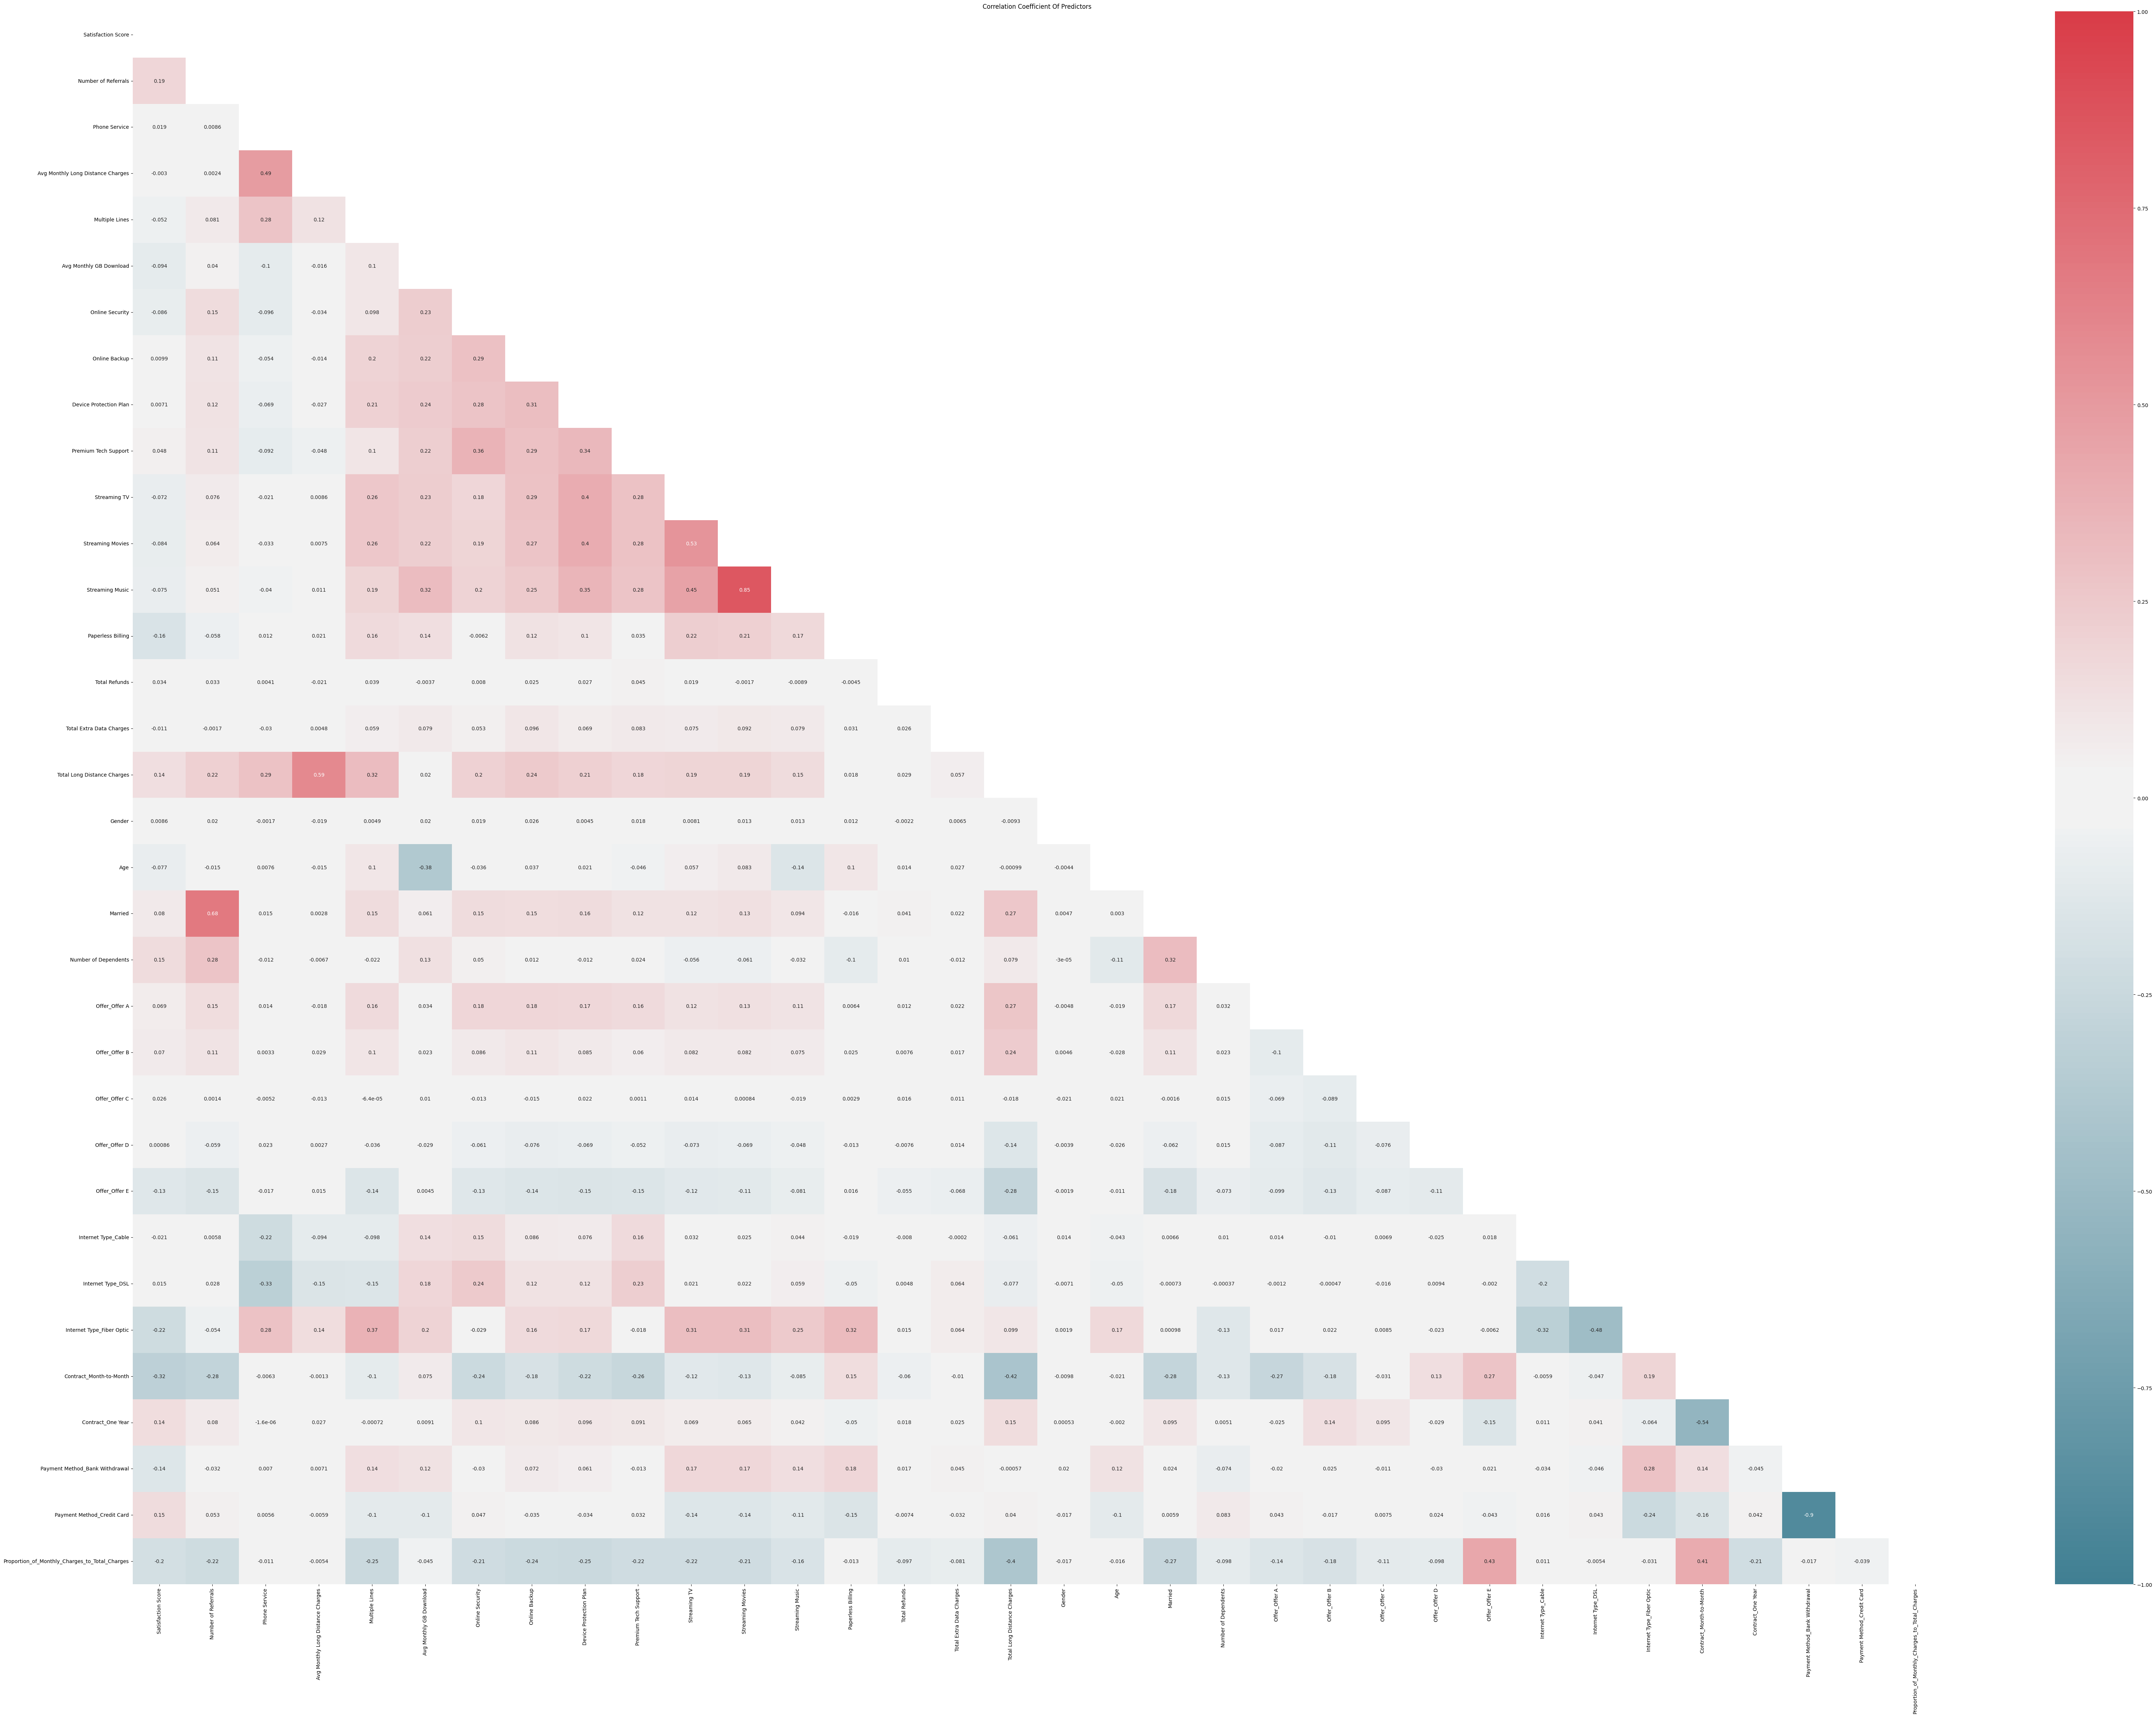

In [ ]:
#'remove manually at '.8' for removing collinearity

# import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# set figure size
plt.figure(figsize=(80,56))

#fig, ax = plt.subplots()
#Choosing a diverging color template:
#https://stackoverflow.com/questions/56536419/how-to-set-center-color-in-heatmap
rdbl = sns.diverging_palette(h_neg=220, h_pos=10, s=74, l=50, sep=10, as_cmap=True)

# Generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(X_train.corr(), dtype=bool))

# df_values_no_BQ_EL_na

# generate heatmap
sns.heatmap(X_train.corr(), cmap=rdbl, annot=True, mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Coefficient Of Predictors')
plt.savefig('correlation_map_reduced_variables.png', bbox_inches='tight', pad_inches=0.0)
plt.show()

## Questions to Ask which could help understand business objectives
Things to Check
- Offer E + Month-to-Month = Higher Churn? Need to group by Offer E and Month-to-Month vs. w/o Offer E
- Fiber Optic Cable customers stream more movies / music - group Optic_cable / movie / music customers vs. movie/music w/o Fiber Optic Cable
- Bundle Premium Tech Support and Online Security? Does this correlate with Age?

### Offer E + Month-to-Month = Higher Churn? Need to group by Offer E and Month-to-Month vs. w/o Offer E

In [ ]:
# offer_e_mm.info()

In [ ]:
offer_e_mm = X_train.copy()
offer_e_mm['Churn'] = y_train

offer_e = (offer_e_mm['Offer_Offer E'] == 1) & (offer_e_mm['Contract_Month-to-Month']==1)

no_offer_e = (offer_e_mm['Offer_Offer E'] == 0) & (offer_e_mm['Contract_Month-to-Month']==1)

# offer_e_mm[mask]

offer_e_mm_only = offer_e_mm[offer_e]
no_offer_e_mm_only = offer_e_mm[no_offer_e]

print("Proportion of customers who are month to month", round(len(offer_e_mm[offer_e_mm['Contract_Month-to-Month']==1])/(len(offer_e_mm)), 2))

print("Churn when offer e and month to month:", round(offer_e_mm_only['Churn'].value_counts()[1]/(offer_e_mm_only['Churn'].value_counts()[0] + offer_e_mm_only['Churn'].value_counts()[1]), 2))
print("Churn when no offer e and month to month:", round(no_offer_e_mm_only['Churn'].value_counts()[1]/(no_offer_e_mm_only['Churn'].value_counts()[0] + no_offer_e_mm_only['Churn'].value_counts()[1]),2))

print("average churn overall:", round((offer_e_mm['Churn'].value_counts()[1])/(offer_e_mm['Churn'].value_counts()[0] + offer_e_mm['Churn'].value_counts()[1]),2))

# print(offer_e_mm_not_only['Churn'].value_counts())



Proportion of customers who are month to month 0.51
Churn when offer e and month to month: 0.59
Churn when no offer e and month to month: 0.42
average churn overall: 0.27


#### Observation: Offer E seems to have an impact on Month to Month Customers - Should avoid offer E when giving month to month contract.

### Fiber Optic Cable

Fiber Optic Cable customers stream more movies / music - group

Optic_cable / movie / music customers vs. movie/music w/o Fiber Optic Cable

In [ ]:
fiber_optic = X_train.copy()
fiber_optic['Churn'] = y_train

fiber_optic_streaming = ((fiber_optic['Internet Type_Fiber Optic'] == 1) & (fiber_optic['Streaming Movies']==1) & (fiber_optic['Streaming Music']==1)
                          & (fiber_optic['Streaming TV'] == 1))

no_fiber_optic_streaming = ((fiber_optic['Internet Type_Fiber Optic'] == 0) & (fiber_optic['Streaming Movies']==1) & (fiber_optic['Streaming Music']==1)
                          & (fiber_optic['Streaming TV'] == 1))

streaming = ((fiber_optic['Streaming Movies']==1) & (fiber_optic['Streaming Music']==1) & (fiber_optic['Streaming TV'] == 1))



# offer_e_mm[mask]

fiber_optic_streaming = fiber_optic[fiber_optic_streaming]

no_fiber_optic_streaming = fiber_optic[no_fiber_optic_streaming]
streaming = fiber_optic[streaming]

print("Churn when Fiber Optic and Streaming:", round(fiber_optic_streaming['Churn'].value_counts()[1]/(fiber_optic_streaming['Churn'].value_counts()[0] + fiber_optic_streaming['Churn'].value_counts()[1]), 2))
print("Churn without Fiber Optic but Streaming:", round(no_fiber_optic_streaming['Churn'].value_counts()[1]/(no_fiber_optic_streaming['Churn'].value_counts()[0] + no_fiber_optic_streaming['Churn'].value_counts()[1]),2))
print("Churn Streaming Overall:", round(streaming['Churn'].value_counts()[1]/(streaming['Churn'].value_counts()[0] + streaming['Churn'].value_counts()[1]),2))

print("average churn overall:", round((fiber_optic['Churn'].value_counts()[1])/(fiber_optic['Churn'].value_counts()[0] + fiber_optic['Churn'].value_counts()[1]),2))

# print(offer_e_mm_not_only['Churn'].value_counts())



Churn when Fiber Optic and Streaming: 0.34
Churn without Fiber Optic but Streaming: 0.15
Churn Streaming Overall: 0.27
average churn overall: 0.27


#### Observation: Streaming customers do not churn as much when they are using an internet service other than fiber optic. Can these customers be pushed into other options? Is Fiber optic 'unreliable'?

### Bundle Premium Tech Support and Online Security? There is correlation with these two bundles.

In [ ]:
Tech_Support_Online_Security = X_train.copy()
Tech_Support_Online_Security['Churn'] = y_train

#Creating Masks

Online_Backup_Online_Security_bundle = (Tech_Support_Online_Security['Online Security'] == 1) & (Tech_Support_Online_Security['Online Backup']==1)

Tech_Support_Online_Security_bundle = (Tech_Support_Online_Security['Online Security'] == 1) & (Tech_Support_Online_Security['Premium Tech Support']==1)

Online_Security_Only = (Tech_Support_Online_Security['Online Security'] == 0) & (Tech_Support_Online_Security['Premium Tech Support']==1)

Tech_Support_Only = (Tech_Support_Online_Security['Online Security'] == 1) & (Tech_Support_Online_Security['Premium Tech Support']==0)


# offer_e_mm[mask]

Online_Backup_Online_Security_bundle = Tech_Support_Online_Security[Online_Backup_Online_Security_bundle]
Tech_Support_Online_Security_bundle = Tech_Support_Online_Security[Tech_Support_Online_Security_bundle]
Online_Security_Only = Tech_Support_Online_Security[Online_Security_Only]
Tech_Support_Only = Tech_Support_Online_Security[Tech_Support_Only]

print("Churn with Online Security and Online Backup:", round(Online_Backup_Online_Security_bundle['Churn'].value_counts()[1]/(Online_Backup_Online_Security_bundle['Churn'].value_counts()[0] + Online_Backup_Online_Security_bundle['Churn'].value_counts()[1]), 2))
print("Churn with Online Security and Tech Support:", round(Tech_Support_Online_Security_bundle['Churn'].value_counts()[1]/(Tech_Support_Online_Security_bundle['Churn'].value_counts()[0] + Tech_Support_Online_Security_bundle['Churn'].value_counts()[1]), 2))
print("Churn Online Security Only:", round(Online_Security_Only['Churn'].value_counts()[1]/(Online_Security_Only['Churn'].value_counts()[0] + Online_Security_Only['Churn'].value_counts()[1]),2))
print("Churn Tech_Support_Only:", round(Tech_Support_Only['Churn'].value_counts()[1]/(Tech_Support_Only['Churn'].value_counts()[0] + Tech_Support_Only['Churn'].value_counts()[1]),2))

print("average churn overall:", round((Tech_Support_Online_Security['Churn'].value_counts()[1])/(Tech_Support_Online_Security['Churn'].value_counts()[0] + Tech_Support_Online_Security['Churn'].value_counts()[1]),2))

# print(offer_e_mm_not_only['Churn'].value_counts())



Churn with Online Security and Online Backup: 0.1
Churn with Online Security and Tech Support: 0.09
Churn Online Security Only: 0.23
Churn Tech_Support_Only: 0.21
average churn overall: 0.27


#### Observation: Bundling Online Security and Tech Support leads to significant reduction in Churn.

### Visualizations

Text(0.5, 1.12, 'Analysis between Churn and Age')

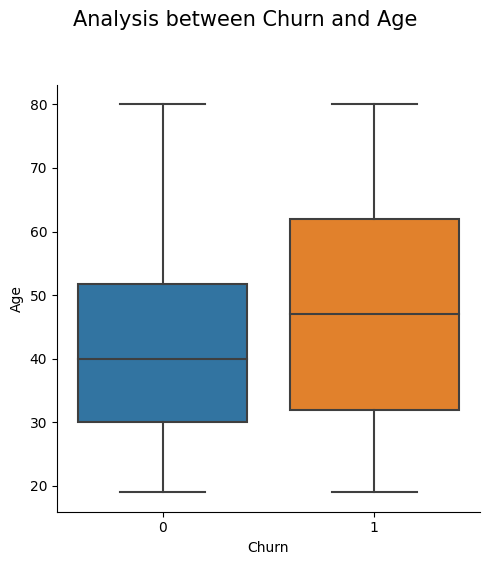

In [ ]:
Plot = sns.catplot(x="Churn", y="Age", kind="box",
                   data=offer_e_mm_only);
Plot.fig.suptitle('Analysis between Churn and Age', size=15, y=1.12)

Text(0.5, 1.12, 'Analysis between Tech Support and Age')

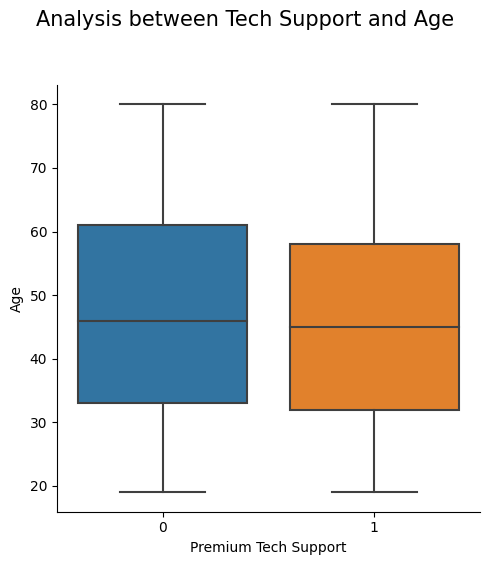

In [ ]:
Plot = sns.catplot(x="Premium Tech Support", y="Age", kind="box",
                   data=X_train);
Plot.fig.suptitle('Analysis between Tech Support and Age', size=15, y=1.12)

Text(0.5, 1.12, 'Analysis between Oneline Security and Age')

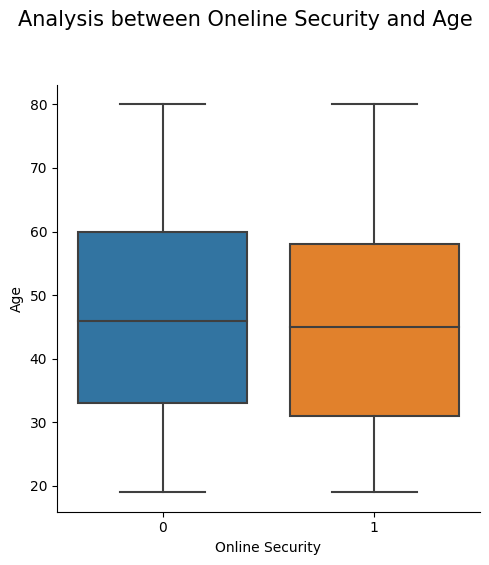

In [ ]:
Plot = sns.catplot(x="Online Security", y="Age", kind="box",
                   data=X_train);
Plot.fig.suptitle('Analysis between Online Security and Age', size=15, y=1.12)

In [ ]:
import scipy.stats as stats

t, p = stats.ttest_ind(X_train['Premium Tech Support'], X_train['Age'])

# Print the results
print("t-statistic:", t)
print("p-value:", p)

t-statistic: -206.42797384159184
p-value: 0.0


### End of visualizations!

## Scaling Data

In [ ]:
#Scale
scaler = MinMaxScaler(feature_range=(0,1))
# Fit the scaler on the training data
scaler.fit(X_train)

# Transform the training data using the scaler
X_train_scale = scaler.transform(X_train)

# Transform the test data using the scaler
X_test_scale = scaler.transform(X_test)


#X_train

#Train

## Oversample via SMOTE and plotting

In [ ]:
#Oversample
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
X_res, y_res = sm.fit_resample(X_train_scale, y_train)

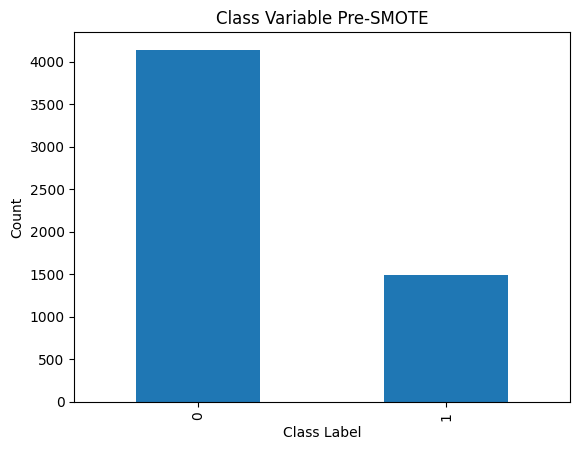

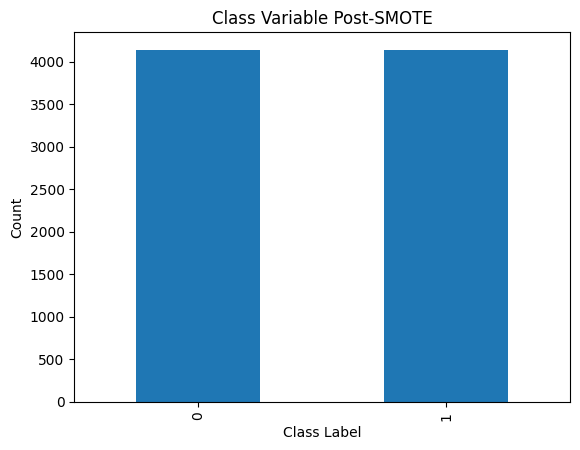

In [ ]:
# fig, axs = plt.subplots(1, 2, figsize=(4, 4))


# Before balance Dataset is now balanced
y_train.value_counts().plot(kind='bar')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.title('Class Variable Pre-SMOTE')
plt.figsize = (4,4)
plt.show()


# Dataset is now balanced
y_res.value_counts().plot(kind='bar')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.title('Class Variable Post-SMOTE')
plt.rcParams['figure.figsize'] = [6, 3]
# plt.figure(figsize = (1,1))
plt.show()

# Doing Early Modeling

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# log_loss_score = make_scorer(score_func=get_log_loss, greater_is_better=False, needs_proba=True)
# Create a dictionary of hyperparameters to search over
params = {'C': [1, 4,5,6,7,8], 'penalty': ['l2'], 'max_iter': [300, 400,500]}

# Create a grid search object
skf = StratifiedKFold(n_splits=5)
lr = LogisticRegression()

gs_LR = GridSearchCV(lr, param_grid=params, cv= skf)

# Fit the grid search object to the training data
gs_LR.fit(X_res, y_res)


# Print the best parameters found by the grid search

print(gs_LR.best_params_)

pred = gs_LR.best_estimator_.predict(X_res)

# log_loss_LR = get_log_loss(y_train, pred)
# print(log_loss_LR)

{'C': 8, 'max_iter': 300, 'penalty': 'l2'}


## Prediction via Logistic Regression Baseline model

### Train Data

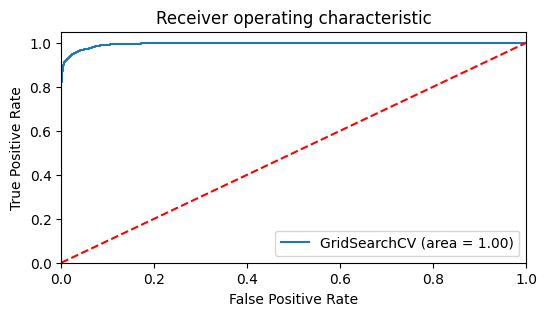

In [ ]:

probs = gs_LR.predict_proba(X_res)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_res, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='GridSearchCV (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Test Data

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


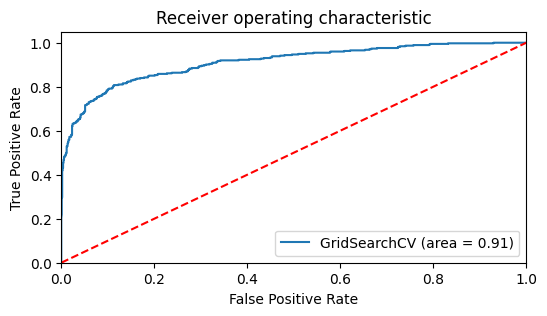

In [ ]:
probs = gs_LR.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='GridSearchCV (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Feature Importance from Train Data

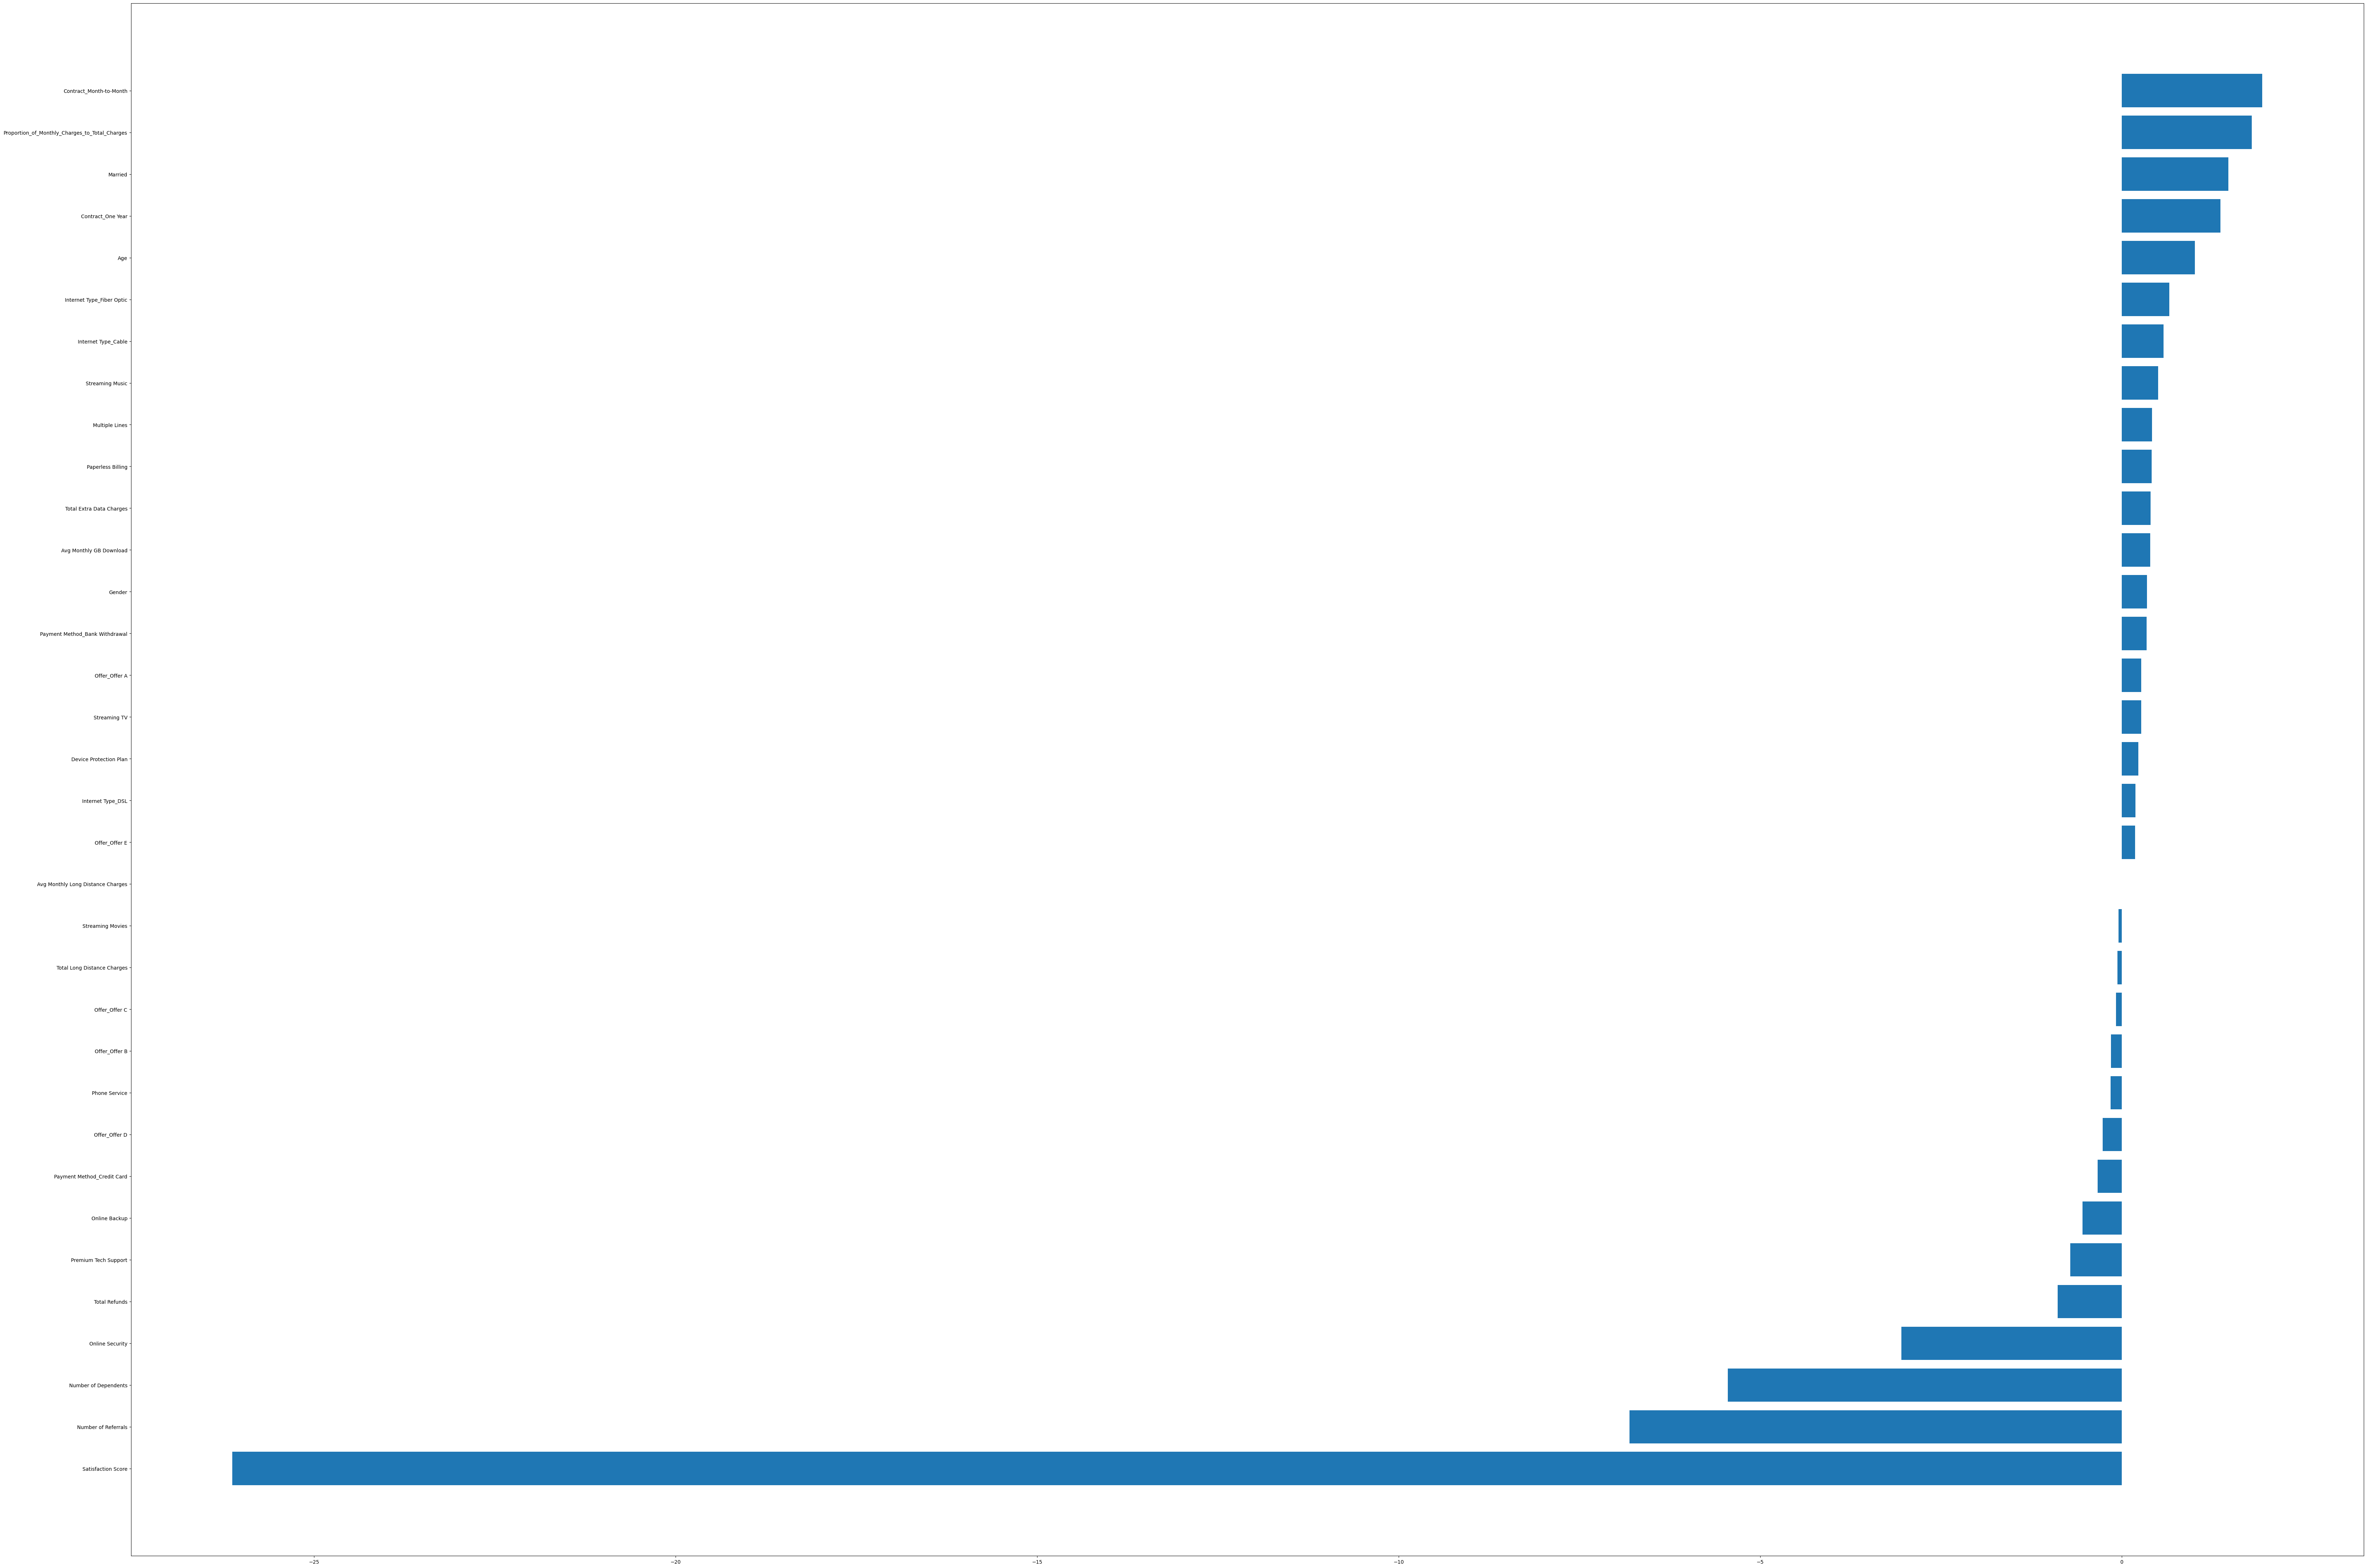

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(80,56))

importance = gs_LR.best_estimator_.coef_[0]

importance_df = pd.DataFrame(list(zip(X_columns, importance)),
               columns =['Name', 'Importance'])
# importance_df = pd.DataFrame(columns = X_columns)

importance_df.sort_values(by='Importance', inplace = True)

plt.barh(importance_df['Name'], importance_df['Importance'])

# plt.bar(X_columns, importance)
plt.show()

In [ ]:
X_train, X_test, y_train, y_test

In [ ]:
classes = gs_LR.predict(X_test)

accuracy = metrics.accuracy_score(classes, y_test)

balanced_accuracy = metrics.balanced_accuracy_score(classes, y_test)

precision = metrics.precision_score(classes, y_test)

average_precision = metrics.average_precision_score(classes, y_test)

f1_score = metrics.f1_score(classes, y_test)

recall = metrics.recall_score(classes, y_test)

print (accuracy, balanced_accuracy, precision, average_precision, f1_score, recall, roc_auc)

0.872249822569198 0.8921672751410554 0.5668449197860963 0.5352581611980907 0.7019867549668873 0.9217391304347826 0.9954706937077415


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
roc_auc

0.9954706937077415

In [ ]:
print(metrics.classification_report(classes, y_test))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92      1179
           1       0.57      0.92      0.70       230

    accuracy                           0.87      1409
   macro avg       0.77      0.89      0.81      1409
weighted avg       0.91      0.87      0.88      1409



PCA - use 1st feature importance on each PCA

Algorithmically remove variables based on multi-collinearity

Segmentation - clustering

# Causal inference

Using this blog post to understand step by step how to build!

https://aws.amazon.com/blogs/opensource/root-cause-analysis-with-dowhy-an-open-source-python-library-for-causal-machine-learning/

In [ ]:
pip install dowhy

In [ ]:
pip install networkx

## Creating Graph based on Rules from Multi-collinearity and feature importance

In [ ]:
# import networkx as nx

# causal_graph = nx.DiGraph([('Satisfaction Score', 'Churn'),
#                            ('Number of Referrals', 'Churn'),
#                            ('Online Security', 'Churn'),
#                            ('Married', 'Number of Dependents'),
#                            ('Married', 'Number of Referrals'),
#                            ('Married', 'Churn')])

In [ ]:
# from dowhy import gcm

# causaldf = X_train[['Satisfaction Score','Churn', 'Number of Referrals', 'Online Security','Married','Number of Referrals']].copy()

# causaldf['Churn'] = y_train

# # Create the structural causal model object
# scm = gcm.StructuralCausalModel(causal_graph)

# # Automatically assign generative models to each node based on the given data
# gcm.auto.assign_causal_mechanisms(scm, causaldf)

## Fitting Causal Models on Nodes

In [ ]:
# gcm.fit(scm, causaldf)

In [ ]:
# import numpy as np


# def convert_to_percentage(value_dictionary):
#     total_absolute_sum = np.sum([abs(v) for v in value_dictionary.values()])
#     return {k: abs(v) / total_absolute_sum * 100 for k, v in value_dictionary.items()}


# arrow_strengths = gcm.arrow_strength(scm, target_node='Churn')

# gcm.util.plot(causal_graph,
#               causal_strengths=convert_to_percentage(arrow_strengths),
#               figure_size=[12, 8])

In [ ]:
#gcm.view_model()

In [ ]:
#identified_estimand = model.identify_effect()

In [ ]:
# import matplotlib.pyplot as plt


# def bar_plot(value_dictionary, ylabel, uncertainty_attribs=None, figsize=(8, 5)):
#     value_dictionary = {k: value_dictionary[k] for k in sorted(value_dictionary)}
#     if uncertainty_attribs is None:
#         uncertainty_attribs = {node: [value_dictionary[node], value_dictionary[node]] for node in value_dictionary}

#     _, ax = plt.subplots(figsize=figsize)
#     ci_plus = [uncertainty_attribs[node][1] - value_dictionary[node] for node in value_dictionary.keys()]
#     ci_minus = [value_dictionary[node] - uncertainty_attribs[node][0] for node in value_dictionary.keys()]
#     yerr = np.array([ci_minus, ci_plus])
#     yerr[abs(yerr) < 10**-7] = 0
#     plt.bar(value_dictionary.keys(), value_dictionary.values(), yerr=yerr, ecolor='#1E88E5', color='#ff0d57', width=0.8)
#     plt.ylabel(ylabel)
#     plt.xticks(rotation=45)
#     ax.spines['right'].set_visible(False)
#     ax.spines['top'].set_visible(False)

#     plt.show()


# iccs = gcm.intrinsic_causal_influence(scm, target_node='Churn', num_samples_randomization=500)

# bar_plot(convert_to_percentage(iccs), ylabel='Variance attribution in %')

USing PyPi DoWhy Documentation:
https://pypi.org/project/dowhy/

https://medium.com/geekculture/a-quickstart-for-causal-analysis-decision-making-with-dowhy-2ce2d4d1efa9

In [ ]:
# https://stackoverflow.com/questions/58535604/installing-pygrahviz-in-google-colab
# --> https://gist.github.com/korakot/a80c04a1945b06e2f4a053f92fecfbf9
!apt install libgraphviz-dev
!pip install graphviz
!pip install pygraphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libgraphviz-dev is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


Preliminary Graph

/usr/local/lib/python3.10/dist-packages/dowhy/causal_model.py:557: UserWarning: 1 variables are assumed unobserved because they are not in the dataset. Configure the logging level to `logging.WARNING` or higher for additional details.
  warnings.warn(


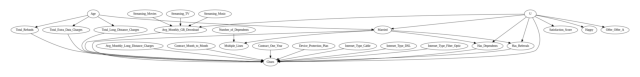

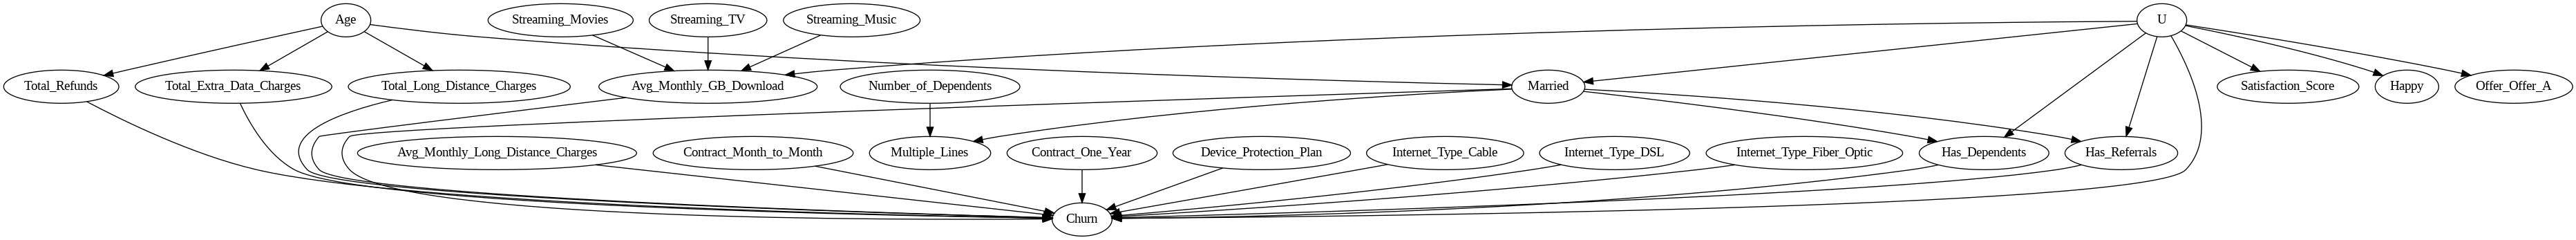

In [ ]:
from dowhy import CausalModel
from IPython.display import Image, display
import graphviz

#Creating the
# causaldf = X_train[['Satisfaction Score', 'Number of Referrals', 'Online Security','Married','Number of Referrals',
#                     'Offer_Offer A', 'Contract_Month-to-Month', 'Number of Dependents']].copy()

#Copying X_Train df
causaldf = X_train.copy()
causaldf['Churn'] = y_train

#Filling in column names with underscores for DoWhy to work properly
causaldf.columns = causaldf.columns.str.replace(' ', '_').str.replace('-', '_')

causaldf['Happy'] = causaldf['Satisfaction_Score'].apply(lambda x: 1 if x > 70 else 0)
causaldf['Has_Dependents'] = causaldf['Number_of_Dependents'].apply(lambda x: 1 if x > 0 else 0)
causaldf['Has_Referrals'] = causaldf['Number_of_Referrals'].apply(lambda x: 1 if x > 0 else 0)

#not included in Churn: Gender, Has_Dependents, Has_referrals

causal_graph = """
digraph {
Age;
Avg_Monthly_GB_Download;
Avg_Monthly_Long_Distance_Charges;
Contract_Month_to_Month;
Contract_One_Year;
Device_Protection_Plan;
Has_Dependents;
Has_Referrals;
Internet_Type_Cable;
Internet_Type_DSL;
Internet_Type_Fiber_Optic;
Married;


Total_Extra_Data_Charges;
Total_Long_Distance_Charges;
Total_Refunds;



U[label="Unobserved Confounders"];
Married -> Has_Dependents; Married -> Has_Referrals; Married->Multiple_Lines;

U->Satisfaction_Score;U->Married;U->Churn; U->Happy; U->Offer_Offer_A; U->Has_Dependents; U->Has_Referrals;
U->Avg_Monthly_GB_Download;

Age -> Married; Age->Total_Extra_Data_Charges; Age->Total_Long_Distance_Charges; Age->Total_Refunds;
Number_of_Dependents->Multiple_Lines;

Streaming_Movies->Avg_Monthly_GB_Download; Streaming_TV->Avg_Monthly_GB_Download; Streaming_Music->Avg_Monthly_GB_Download;


Avg_Monthly_GB_Download->Churn; Avg_Monthly_Long_Distance_Charges->Churn; Contract_Month_to_Month->Churn; Contract_One_Year->Churn;
Device_Protection_Plan->Churn; Has_Dependents->Churn; Has_Referrals->Churn; Internet_Type_Cable->Churn; Internet_Type_DSL->Churn; Internet_Type_Fiber_Optic->Churn;
Married->Churn;

 Total_Extra_Data_Charges->Churn; Total_Long_Distance_Charges->Churn;
Total_Refunds->Churn;
}
"""


# Multiple_Lines;
# Offer_Offer_A;
# Offer_Offer_B;
# Offer_Offer_C;
# Offer_Offer_D;
# Offer_Offer_E;
# Online_Backup;
# Online_Security;
# Paperless_Billing;
# Payment_Method_Bank_Withdrawal;
# Payment_Method_Credit_Card;
# Phone_Service;
# Premium_Tech_Support;
# Proportion_of_Monthly_Charges_to_Total_Charges;
# Satisfaction_Score;
# Streaming_Movies;
# Streaming_Music;
# Streaming_TV;




# Multiple_Lines->Churn; Offer_Offer_A->Churn; Offer_Offer_B->Churn; Offer_Offer_C->Churn; Offer_Offer_D->Churn;
# Offer_Offer_E->Churn; Online_Backup->Churn; Online_Security -> Churn; Paperless_Billing->Churn;
# Payment_Method_Bank_Withdrawal->Churn; Payment_Method_Credit_Card->Churn; Phone_Service->Churn; Premium_Tech_Support->Churn;
# Proportion_of_Monthly_Charges_to_Total_Charges->Churn; Satisfaction_Score -> Churn; Streaming_Movies->Churn;
# Streaming_Music->Churn; Streaming_TV->Churn;

model= CausalModel(
        data = causaldf,
        graph=causal_graph.replace("\n", " "),
        treatment='Married',
        outcome='Churn')
model.view_model()
display(Image(filename="causal_model.png"))

In [ ]:
causaldf.columns.sort_values()

Index(['Age', 'Avg_Monthly_GB_Download', 'Avg_Monthly_Long_Distance_Charges',
       'Churn', 'Contract_Month_to_Month', 'Contract_One_Year',
       'Device_Protection_Plan', 'Gender', 'Happy', 'Has_Dependents',
       'Has_Referrals', 'Internet_Type_Cable', 'Internet_Type_DSL',
       'Internet_Type_Fiber_Optic', 'Married', 'Multiple_Lines',
       'Number_of_Dependents', 'Number_of_Referrals', 'Offer_Offer_A',
       'Offer_Offer_B', 'Offer_Offer_C', 'Offer_Offer_D', 'Offer_Offer_E',
       'Online_Backup', 'Online_Security', 'Paperless_Billing',
       'Payment_Method_Bank_Withdrawal', 'Payment_Method_Credit_Card',
       'Phone_Service', 'Premium_Tech_Support',
       'Proportion_of_Monthly_Charges_to_Total_Charges', 'Satisfaction_Score',
       'Streaming_Movies', 'Streaming_Music', 'Streaming_TV',
       'Total_Extra_Data_Charges', 'Total_Long_Distance_Charges',
       'Total_Refunds'],
      dtype='object')

## Potential Treatments

In [ ]:
potential_treatments = ['Device_Protection_Plan', 'Offer_Offer_A',
       'Offer_Offer_B', 'Offer_Offer_C', 'Offer_Offer_D', 'Offer_Offer_E',
       'Online_Backup', 'Online_Security', 'Premium_Tech_Support',
       'Proportion_of_Monthly_Charges_to_Total_Charges', 'Streaming_Movies', 'Streaming_Music', 'Streaming_TV']

Adding only the treatments and rules for effects on Churn outcome

In [ ]:
def Tech_Support_Online_Security_bundle(df):
  if df['Online_Security'] + df['Premium_Tech_Support'] == 2:
    return 1
  else:
    return 0


def Online_Backup_Online_Security_bundle(df):
  if df['Online_Security'] + df['Online_Backup'] == 2:
    return 1
  else:
    return 0

In [ ]:
causaldf = X_train.copy()
causaldf.columns = causaldf.columns.str.replace(' ', '_').str.replace('-', '_')
causaldf['Has_Online_Security_Tech_Support'] = causaldf.apply(lambda x: Tech_Support_Online_Security_bundle(x), axis = 1)

Trying to utilize only treatments in this Graph

/usr/local/lib/python3.10/dist-packages/dowhy/causal_model.py:557: UserWarning: 1 variables are assumed unobserved because they are not in the dataset. Configure the logging level to `logging.WARNING` or higher for additional details.
  warnings.warn(


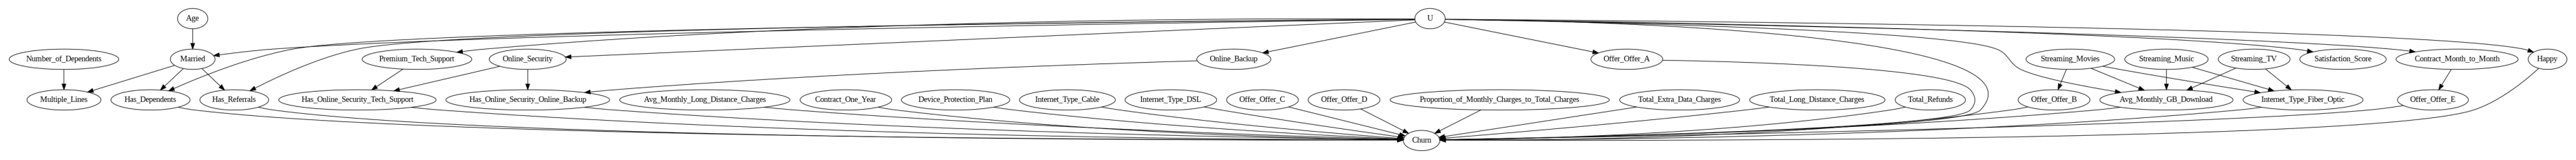

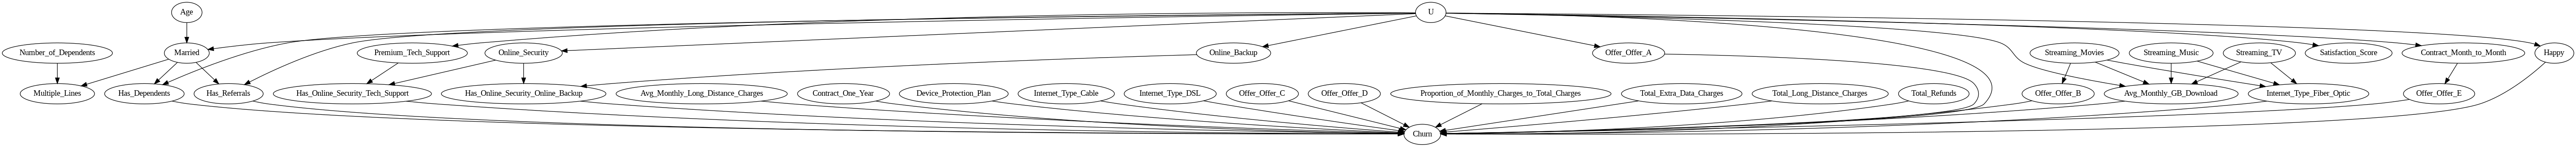

In [ ]:
from dowhy import CausalModel
from IPython.display import Image, display
import graphviz

#Creating the
# causaldf = X_train[['Satisfaction Score', 'Number of Referrals', 'Online Security','Married','Number of Referrals',
#                     'Offer_Offer A', 'Contract_Month-to-Month', 'Number of Dependents']].copy()

#Copying X_Train df
causaldf = X_train.copy()
causaldf['Churn'] = y_train

#Filling in column names with underscores for DoWhy to work properly
causaldf.columns = causaldf.columns.str.replace(' ', '_').str.replace('-', '_')

#New Columns
causaldf['Happy'] = causaldf['Satisfaction_Score'].apply(lambda x: 1 if x > 70 else 0)
causaldf['Has_Dependents'] = causaldf['Number_of_Dependents'].apply(lambda x: 1 if x > 0 else 0)
causaldf['Has_Referrals'] = causaldf['Number_of_Referrals'].apply(lambda x: 1 if x > 0 else 0)
causaldf['Has_Online_Security_Tech_Support'] = causaldf.apply(lambda x: Tech_Support_Online_Security_bundle(x), axis = 1)
causaldf['Has_Online_Security_Online_Backup'] = causaldf.apply(lambda x: Online_Backup_Online_Security_bundle(x), axis = 1)



#not included in Churn: Gender, Has_Dependents, Has_referrals

causal_graph = """
digraph {
Age;
Avg_Monthly_GB_Download;
Avg_Monthly_Long_Distance_Charges;
Contract_Month_to_Month;
Contract_One_Year;
Device_Protection_Plan;
Happy;
Has_Dependents;
Has_Referrals;
Has_Online_Security_Tech_Support;
Has_Online_Security_Online_Backup;
Internet_Type_Cable;
Internet_Type_DSL;
Internet_Type_Fiber_Optic;
Married;
Offer_Offer_A;
Offer_Offer_B;
Offer_Offer_C;
Offer_Offer_D;
Offer_Offer_E;
Online_Backup;
Online_Security;
Premium_Tech_Support;
Proportion_of_Monthly_Charges_to_Total_Charges;
Streaming_Movies;
Streaming_Music;
Streaming_TV;


Total_Extra_Data_Charges;
Total_Long_Distance_Charges;
Total_Refunds;



U[label="Unobserved Confounders"];
Married -> Has_Dependents; Married -> Has_Referrals; Married->Multiple_Lines;

U->Satisfaction_Score;U->Married;U->Churn; U->Happy; U->Offer_Offer_A; U->Has_Dependents; U->Has_Referrals;
U-> Contract_Month_to_Month;
U->Avg_Monthly_GB_Download;
U-> Online_Backup;
U-> Online_Security;
U-> Premium_Tech_Support;

Contract_Month_to_Month->Offer_Offer_E;

Streaming_Movies->Offer_Offer_B;

Age -> Married;
Number_of_Dependents->Multiple_Lines;

Online_Backup->Has_Online_Security_Online_Backup;
Online_Security -> Has_Online_Security_Online_Backup;
Online_Security -> Has_Online_Security_Tech_Support;
Premium_Tech_Support->Has_Online_Security_Tech_Support;

Streaming_Movies->Avg_Monthly_GB_Download; Streaming_TV->Avg_Monthly_GB_Download; Streaming_Music->Avg_Monthly_GB_Download;

Streaming_Movies->Internet_Type_Fiber_Optic; Streaming_TV->Internet_Type_Fiber_Optic; Streaming_Music->Internet_Type_Fiber_Optic;


Avg_Monthly_GB_Download->Churn; Avg_Monthly_Long_Distance_Charges->Churn; Contract_One_Year->Churn;
Device_Protection_Plan->Churn; Has_Referrals->Churn; Happy->Churn; Has_Dependents->Churn;
Internet_Type_Cable->Churn; Internet_Type_DSL->Churn; Internet_Type_Fiber_Optic->Churn;
Offer_Offer_A->Churn; Offer_Offer_B->Churn; Offer_Offer_C->Churn; Offer_Offer_D->Churn;
Offer_Offer_E->Churn;

Proportion_of_Monthly_Charges_to_Total_Charges->Churn;

Has_Online_Security_Tech_Support-> Churn;
Has_Online_Security_Online_Backup -> Churn;

Total_Extra_Data_Charges->Churn; Total_Long_Distance_Charges->Churn;
Total_Refunds->Churn;
}
"""


# Multiple_Lines;
# Offer_Offer_A;
# Offer_Offer_B;
# Offer_Offer_C;
# Offer_Offer_D;
# Offer_Offer_E;
# Online_Backup;
# Online_Security;
# Paperless_Billing;
# Payment_Method_Bank_Withdrawal;
# Payment_Method_Credit_Card;
# Phone_Service;
# Premium_Tech_Support;
# Proportion_of_Monthly_Charges_to_Total_Charges;
# Satisfaction_Score;
# Streaming_Movies;
# Streaming_Music;
# Streaming_TV;




# Multiple_Lines->Churn; Offer_Offer_A->Churn; Offer_Offer_B->Churn; Offer_Offer_C->Churn; Offer_Offer_D->Churn;
# Offer_Offer_E->Churn; Online_Backup->Churn; Online_Security -> Churn; Paperless_Billing->Churn;
# Payment_Method_Bank_Withdrawal->Churn; Payment_Method_Credit_Card->Churn; Phone_Service->Churn; Premium_Tech_Support->Churn;
# Proportion_of_Monthly_Charges_to_Total_Charges->Churn; Satisfaction_Score -> Churn; Streaming_Movies->Churn;
# Streaming_Music->Churn; Streaming_TV->Churn;

model= CausalModel(
        data = causaldf,
        graph=causal_graph.replace("\n", " "),
        treatment='Married',
        outcome='Churn')
model.view_model(size=(48, 32))
display(Image(filename="causal_model.png"))

### Limiting Causal Graphs to proposed rules and some related nodes. Final output for this version of Causal Graph in presentation.

/usr/local/lib/python3.10/dist-packages/dowhy/causal_model.py:557: UserWarning: 1 variables are assumed unobserved because they are not in the dataset. Configure the logging level to `logging.WARNING` or higher for additional details.
  warnings.warn(


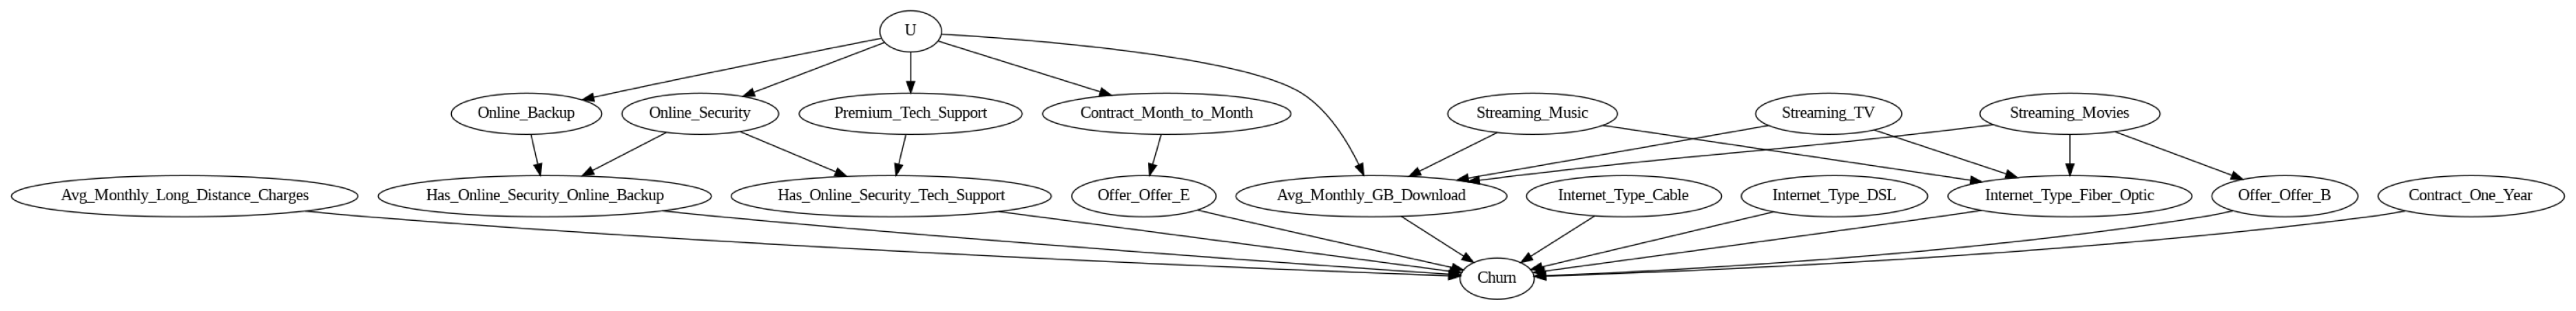

In [ ]:
from dowhy import CausalModel
from IPython.display import Image, display
import graphviz

#Creating the
# causaldf = X_train[['Satisfaction Score', 'Number of Referrals', 'Online Security','Married','Number of Referrals',
#                     'Offer_Offer A', 'Contract_Month-to-Month', 'Number of Dependents']].copy()

#Copying X_Train df
causaldf = X_train.copy()
causaldf['Churn'] = y_train

#Filling in column names with underscores for DoWhy to work properly
causaldf.columns = causaldf.columns.str.replace(' ', '_').str.replace('-', '_')

#New Columns
causaldf['Happy'] = causaldf['Satisfaction_Score'].apply(lambda x: 1 if x > 70 else 0)
causaldf['Has_Dependents'] = causaldf['Number_of_Dependents'].apply(lambda x: 1 if x > 0 else 0)
causaldf['Has_Referrals'] = causaldf['Number_of_Referrals'].apply(lambda x: 1 if x > 0 else 0)
causaldf['Has_Online_Security_Tech_Support'] = causaldf.apply(lambda x: Tech_Support_Online_Security_bundle(x), axis = 1)
causaldf['Has_Online_Security_Online_Backup'] = causaldf.apply(lambda x: Online_Backup_Online_Security_bundle(x), axis = 1)



#not included in Churn: Gender, Has_Dependents, Has_referrals

causal_graph = """
digraph {

Avg_Monthly_GB_Download;
Avg_Monthly_Long_Distance_Charges;
Contract_Month_to_Month;

Has_Online_Security_Tech_Support;
Has_Online_Security_Online_Backup;

Internet_Type_Cable;
Internet_Type_DSL;
Internet_Type_Fiber_Optic;


Offer_Offer_B;
Offer_Offer_E;

Online_Backup;
Online_Security;
Premium_Tech_Support;

Streaming_Movies;
Streaming_Music;
Streaming_TV;

U[label="Unobserved Confounders"];


U-> Contract_Month_to_Month;
U->Avg_Monthly_GB_Download;

U-> Online_Backup;
U-> Online_Security;
U-> Premium_Tech_Support;

Contract_Month_to_Month->Offer_Offer_E;

Streaming_Movies->Offer_Offer_B;


Online_Backup->Has_Online_Security_Online_Backup;
Online_Security -> Has_Online_Security_Online_Backup;
Online_Security -> Has_Online_Security_Tech_Support;
Premium_Tech_Support->Has_Online_Security_Tech_Support;

Streaming_Movies->Avg_Monthly_GB_Download; Streaming_TV->Avg_Monthly_GB_Download; Streaming_Music->Avg_Monthly_GB_Download;

Streaming_Movies->Internet_Type_Fiber_Optic; Streaming_TV->Internet_Type_Fiber_Optic; Streaming_Music->Internet_Type_Fiber_Optic;

Avg_Monthly_GB_Download->Churn; Avg_Monthly_Long_Distance_Charges->Churn; Contract_One_Year->Churn;



Internet_Type_Cable->Churn; Internet_Type_DSL->Churn; Internet_Type_Fiber_Optic->Churn;
Offer_Offer_B->Churn;
Offer_Offer_E->Churn;

Has_Online_Security_Tech_Support-> Churn;
Has_Online_Security_Online_Backup -> Churn;

}
"""

model= CausalModel(
        data = causaldf,
        graph=causal_graph.replace("\n", " "),
        treatment='Has_Online_Security_Tech_Support',
        outcome='Churn')
model.view_model(size=(48, 32))
# display(Image(filename="causal_model.png"))

### Code to make models and see the effect of treatments

In [ ]:
def model_tests(treatment):
  model= CausalModel(
          data = causaldf,
          graph=causal_graph.replace("\n", " "),
          treatment=treatment,
          outcome='Churn')

  estimands = model.identify_effect()
  estimate = model.estimate_effect(estimands,
          method_name="backdoor.propensity_score_weighting",
          test_significance=True)
  print(estimate)

  refute = model.refute_estimate(estimands,estimate, "random_common_cause")
  print(refute)

  refutel = model.refute_estimate(estimands,estimate, "data_subset_refuter")
  print(refutel)

  refutel = model.refute_estimate(estimands,estimate, "placebo_treatment_refuter")
  print(refutel)

In [ ]:
  model= CausalModel(
          data = causaldf,
          graph=causal_graph.replace("\n", " "),
          treatment='Offer_Offer_B',
          outcome='Churn')

  estimands = model.identify_effect()
  estimate = model.estimate_effect(estimands,
          method_name="backdoor.propensity_score_weighting",
          test_significance=True)
  print(estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
       d                                   
────────────────(E[Churn|Streaming_Movies])
d[Offer_Offer_B]                           
Estimand assumption 1, Unconfoundedness: If U→{Offer_Offer_B} and U→Churn then P(Churn|Offer_Offer_B,Streaming_Movies,U) = P(Churn|Offer_Offer_B,Streaming_Movies)

## Realized estimand
b: Churn~Offer_Offer_B+Streaming_Movies
Target units: ate

## Estimate
Mean value: -0.17010523922004928
p-value: [0.999, 1]



### Using Offer B as the Treatment

In [ ]:
model_tests('Offer_Offer_B')

/usr/local/lib/python3.10/dist-packages/dowhy/causal_model.py:557: UserWarning: 1 variables are assumed unobserved because they are not in the dataset. Configure the logging level to `logging.WARNING` or higher for additional details.
  warnings.warn(


*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
       d                                   
────────────────(E[Churn|Streaming_Movies])
d[Offer_Offer_B]                           
Estimand assumption 1, Unconfoundedness: If U→{Offer_Offer_B} and U→Churn then P(Churn|Offer_Offer_B,Streaming_Movies,U) = P(Churn|Offer_Offer_B,Streaming_Movies)

## Realized estimand
b: Churn~Offer_Offer_B+Streaming_Movies
Target units: ate

## Estimate
Mean value: -0.17010523922004928
p-value: [0.999, 1]

Refute: Add a random common cause
Estimated effect:-0.17010523922004928
New effect:-0.17010523922004928
p value:1.0

Refute: Use a subset of data
Estimated effect:-0.17010523922004928
New effect:-0.1694001398442484
p value:0.8400000000000001

Refute: Use a Placebo Treatment
Estimated effect:-0.17010523922004928
New effect:-0.00631037195095411
p value:0.62



### Using Offer E as Treatment on Contract_Month-to-Month

In [ ]:
model_tests('Offer_Offer_E')

/usr/local/lib/python3.10/dist-packages/dowhy/causal_model.py:557: UserWarning: 1 variables are assumed unobserved because they are not in the dataset. Configure the logging level to `logging.WARNING` or higher for additional details.
  warnings.warn(


*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
       d                                          
────────────────(E[Churn|Contract_Month_to_Month])
d[Offer_Offer_E]                                  
Estimand assumption 1, Unconfoundedness: If U→{Offer_Offer_E} and U→Churn then P(Churn|Offer_Offer_E,Contract_Month_to_Month,U) = P(Churn|Offer_Offer_E,Contract_Month_to_Month)

## Realized estimand
b: Churn~Offer_Offer_E+Contract_Month_to_Month
Target units: ate

## Estimate
Mean value: 0.291582133302416
p-value: [0.999, 1]

Refute: Add a random common cause
Estimated effect:0.291582133302416
New effect:0.29158213330241606
p value:1.0

Refute: Use a subset of data
Estimated effect:0.291582133302416
New effect:0.29190323801319445
p value:0.98

Refute: Use a Placebo Treatment
Estimated effect:0.291582133302416
New effect:-0.0057321299652082994
p value:0.58



### Using Internet_Type_Fiber_Optic as a treatment for customers who are streaming movies, tv and music.

In [ ]:
model_tests('Internet_Type_Fiber_Optic')

/usr/local/lib/python3.10/dist-packages/dowhy/causal_model.py:557: UserWarning: 1 variables are assumed unobserved because they are not in the dataset. Configure the logging level to `logging.WARNING` or higher for additional details.
  warnings.warn(


*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
             d                                                                
────────────────────────────(E[Churn|Streaming_Music,Streaming_Movies,Streamin
d[Internet_Type_Fiber_Optic]                                                  

      
g_TV])
      
Estimand assumption 1, Unconfoundedness: If U→{Internet_Type_Fiber_Optic} and U→Churn then P(Churn|Internet_Type_Fiber_Optic,Streaming_Music,Streaming_Movies,Streaming_TV,U) = P(Churn|Internet_Type_Fiber_Optic,Streaming_Music,Streaming_Movies,Streaming_TV)

## Realized estimand
b: Churn~Internet_Type_Fiber_Optic+Streaming_Music+Streaming_Movies+Streaming_TV
Target units: ate

## Estimate
Mean value: 0.2563420421958045
p-value: [0.999, 1]

Refute: Add a random common cause
Estimated effect:0.2563420421958045
New effect:0.2563420421958044
p value:1.0

Refute: Use a subset of data

### Using a bundle of Online Security and Premium Tech Support as a treatment for churn

In [ ]:
model_tests('Has_Online_Security_Tech_Support')

/usr/local/lib/python3.10/dist-packages/dowhy/causal_model.py:557: UserWarning: 1 variables are assumed unobserved because they are not in the dataset. Configure the logging level to `logging.WARNING` or higher for additional details.
  warnings.warn(


*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
                 d                                                            
───────────────────────────────────(E[Churn|Online_Security,Premium_Tech_Suppo
d[Has_Online_Security_Tech_Support]                                           

    
rt])
    
Estimand assumption 1, Unconfoundedness: If U→{Has_Online_Security_Tech_Support} and U→Churn then P(Churn|Has_Online_Security_Tech_Support,Online_Security,Premium_Tech_Support,U) = P(Churn|Has_Online_Security_Tech_Support,Online_Security,Premium_Tech_Support)

## Realized estimand
b: Churn~Has_Online_Security_Tech_Support+Online_Security+Premium_Tech_Support
Target units: ate

## Estimate
Mean value: -0.21452455912078783
p-value: [0.999, 1]

Refute: Add a random common cause
Estimated effect:-0.21452455912078783
New effect:-0.2145245591207879
p value:1.0

Refute: Use a subset of data

### Using a bundle of Online Security and Online Backup as a treatment for churn

In [ ]:
model_tests('Has_Online_Security_Online_Backup')

/usr/local/lib/python3.10/dist-packages/dowhy/causal_model.py:557: UserWarning: 1 variables are assumed unobserved because they are not in the dataset. Configure the logging level to `logging.WARNING` or higher for additional details.
  warnings.warn(


*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
                 d                                                          
────────────────────────────────────(E[Churn|Online_Security,Online_Backup])
d[Has_Online_Security_Online_Backup]                                        
Estimand assumption 1, Unconfoundedness: If U→{Has_Online_Security_Online_Backup} and U→Churn then P(Churn|Has_Online_Security_Online_Backup,Online_Security,Online_Backup,U) = P(Churn|Has_Online_Security_Online_Backup,Online_Security,Online_Backup)

## Realized estimand
b: Churn~Has_Online_Security_Online_Backup+Online_Security+Online_Backup
Target units: ate

## Estimate
Mean value: -0.19860258024196686
p-value: [0.999, 1]

Refute: Add a random common cause
Estimated effect:-0.19860258024196686
New effect:-0.1986025802419669
p value:1.0

Refute: Use a subset of data
Estimated effect:-0.19860258024196686


## Treatments were valid treatments to churn. If I were proposing which treatment to prioritize based on the expected effect on churn, I would target month to month customers and try to see if there is another offer other than offer E that would be acceptable as the churn increase is around 29% more likely to churn when using offer E for month to month customers.

### Creating Dictionary of Treatment Models

In [ ]:
treatment_model = {}
treatment_outcome ={}

for treatment in potential_treatments:
  model= CausalModel(
          data = causaldf,
          graph=causal_graph.replace("\n", " "),
          treatment=treatment,
          outcome='Churn')
  estimands = model.identify_effect()
  treatment_model.update({treatment:model})
  treatment_outcome.update({treatment:estimands})
  print(treatment)
  print(estimands)
  # model.view_model()
  # display(Image(filename="causal_model.png"))

/usr/local/lib/python3.10/dist-packages/dowhy/causal_model.py:557: UserWarning: 1 variables are assumed unobserved because they are not in the dataset. Configure the logging level to `logging.WARNING` or higher for additional details.
  warnings.warn(


Device_Protection_Plan
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
            d                      
─────────────────────────(E[Churn])
d[Device_Protection_Plan]          
Estimand assumption 1, Unconfoundedness: If U→{Device_Protection_Plan} and U→Churn then P(Churn|Device_Protection_Plan,,U) = P(Churn|Device_Protection_Plan,)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



Offer_Offer_A
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
No such variable(s) found!

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

Offer_Offer_B
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
       d                                   
────────────────(E[Churn|Streaming_Movies])
d[Offer_Offer_B]                           
Estimand assumption 1, Unconfoundedness: If U→{Offer_Offer_B} and U→Churn then P(Churn|Offer_Offer_B,Streaming_Movies,U) = P(Churn|Offer_Offer_B,Streaming_Movies)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



Offer_Offer_C
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
       d                  
────────────────(E[Churn])
d[Offer_Offer_C]          
Estimand assumption 1, Unconfoundedness: If U→{Offer_Offer_C} and U→Churn then P(Churn|Offer_Offer_C,,U) = P(Churn|Offer_Offer_C,)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

Offer_Offer_D
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
       d                  
────────────────(E[Churn])
d[Offer_Offer_D]          
Estimand assumption 1, Unconfoundedness: If U→{Offer_Offer_D} and U→Churn then P(Churn|Offer_Offer_D,,U) = P(Churn|Offer_Offer_D,)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



Offer_Offer_E
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
       d                  
────────────────(E[Churn])
d[Offer_Offer_E]          
Estimand assumption 1, Unconfoundedness: If U→{Offer_Offer_E} and U→Churn then P(Churn|Offer_Offer_E,,U) = P(Churn|Offer_Offer_E,)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

Online_Backup
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
       d                  
────────────────(E[Churn])
d[Online_Backup]          
Estimand assumption 1, Unconfoundedness: If U→{Online_Backup} and U→Churn then P(Churn|Online_Backup,,U) = P(Churn|Online_Backup,)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



Online_Security
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
        d                   
──────────────────(E[Churn])
d[Online_Security]          
Estimand assumption 1, Unconfoundedness: If U→{Online_Security} and U→Churn then P(Churn|Online_Security,,U) = P(Churn|Online_Security,)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

Premium_Tech_Support
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
           d                     
───────────────────────(E[Churn])
d[Premium_Tech_Support]          
Estimand assumption 1, Unconfoundedness: If U→{Premium_Tech_Support} and U→Churn then P(Churn|Premium_Tech_Support,,U) = P(Churn|Premium_Tech_Support,)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!


Proportion_of_Monthly_Charges_to_Total_Charges
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
No such variable(s) found!

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

Streaming_Movies
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
         d                   
───────────────────(E[Churn])
d[Streaming_Movies]          
Estimand assumption 1, Unconfoundedness: If U→{Streaming_Movies} and U→Churn then P(Churn|Streaming_Movies,,U) = P(Churn|Streaming_Movies,)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

Streaming_Music
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
        d                   
──────────────────(E[Churn])
d[Streaming_Music]          
Es

In [ ]:
treatment_outcome.items()

dict_items([('Device_Protection_Plan', <dowhy.causal_identifier.identified_estimand.IdentifiedEstimand object at 0x7e2b0a8d4c10>), ('Offer_Offer_A', <dowhy.causal_identifier.identified_estimand.IdentifiedEstimand object at 0x7e2ab7c843d0>), ('Offer_Offer_B', <dowhy.causal_identifier.identified_estimand.IdentifiedEstimand object at 0x7e2abc170cd0>), ('Offer_Offer_C', <dowhy.causal_identifier.identified_estimand.IdentifiedEstimand object at 0x7e2abc183400>), ('Offer_Offer_D', <dowhy.causal_identifier.identified_estimand.IdentifiedEstimand object at 0x7e2abc183160>), ('Offer_Offer_E', <dowhy.causal_identifier.identified_estimand.IdentifiedEstimand object at 0x7e2abc1815d0>), ('Online_Backup', <dowhy.causal_identifier.identified_estimand.IdentifiedEstimand object at 0x7e2abc19c8b0>), ('Online_Security', <dowhy.causal_identifier.identified_estimand.IdentifiedEstimand object at 0x7e2abc1633d0>), ('Premium_Tech_Support', <dowhy.causal_identifier.identified_estimand.IdentifiedEstimand object a

In [ ]:
model.view_model(size=(48, 32))

In [ ]:
# treatment_outcome['Offer_Offer_C']._common_causes
print(treatment_model['Offer_Offer_C'])

In [ ]:
treatments_to_investigate = ['Offer_Offer_B', 'Offer_Offer_C', 'Offer_Offer_D', 'Offer_Offer_E', 'Online_Backup',
                             'Online_Security', 'Premium_Tech_Support', 'Streaming_Movies', 'Streaming_Music',
                             'Streaming_TV']

In [ ]:
  estimate = model.estimate_effect(treatment_outcome['Offer_Offer_B'],
          method_name="backdoor.propensity_score_weighting",
          test_significance=True)
  # .propensity_stratification_score

ERROR:dowhy.causal_estimator:No common causes/confounders present. Propensity score based methods are not applicable


Exception: ignored

In [ ]:
  estimate = model.estimate_effect(treatment_outcome['Offer_Offer_B'],
          method_name="backdoor.generalized_linear_model",
          test_significance=True)
  # , method_params = {'glm_family': 'statsmodels.api.families.Binomial()'}
  print(estimate)

ValueError: ignored

In [ ]:
  estimate = model.estimate_effect(treatment_outcome['Offer_Offer_B'],
          method_name="backdoor.generalized_linear_model",
          test_significance=True)
  print(estimate)

ValueError: ignored

In [ ]:
  estimate = model.estimate_effect(treatment_outcome['Offer_Offer_E'],
          method_name="backdoor.propensity_score_weighting",
          test_significance=True)
  print(estimate)


In [ ]:
print(estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
       d                  
────────────────(E[Churn])
d[Offer_Offer_B]          
Estimand assumption 1, Unconfoundedness: If U→{Offer_Offer_B} and U→Churn then P(Churn|Offer_Offer_B,,U) = P(Churn|Offer_Offer_B,)

## Realized estimand
b: Churn~Offer_Offer_B+Offer_Offer_B*Offer_Offer_D+Offer_Offer_B*Happy+Offer_Offer_B*Has_Dependents+Offer_Offer_B*Internet_Type_DSL+Offer_Offer_B*Online_Backup+Offer_Offer_B*Device_Protection_Plan+Offer_Offer_B*Avg_Monthly_Long_Distance_Charges+Offer_Offer_B*Internet_Type_Cable+Offer_Offer_B*Premium_Tech_Support+Offer_Offer_B*Online_Security+Offer_Offer_B*Offer_Offer_A+Offer_Offer_B*Proportion_of_Monthly_Charges_to_Total_Charges+Offer_Offer_B*Streaming_Music+Offer_Offer_B*Offer_Offer_C+Offer_Offer_B*Has_Referrals+Offer_Offer_B*Total_Refunds+Offer_Offer_B*Offer_Offer_E+Offer_Offer_B*Total_Long_Distance_

In [ ]:
#Causal Effect Estimation
causal_estimates = {}
for treatment in treatments_to_investigate:
  estimate = model.estimate_effect(estimands,
          method_name="backdoor.linear_regression",
          test_significance=True)
  print(estimate)

KeyError: ignored

In [ ]:
#Causal Effect Estimation
estimate = model.estimate_effect(estimands,
        method_name="mediation.two_stage_regression",
                                            target_units = "ate",
                                            method_params={"weighting_scheme":"ips_weight"})
print(estimate)

KeyError: ignored

In [ ]:
from dowhy import CausalModel
import dowhy.datasets

# Load some sample data
data = dowhy.datasets.linear_dataset(
    beta=10,
    num_common_causes=5,
    num_instruments=2,
    num_samples=10000,
    treatment_is_binary=True)

In [ ]:
data['gml_graph']

'graph[directed 1node[ id "y" label "y"]node[ id "W0" label "W0"] node[ id "W1" label "W1"] node[ id "W2" label "W2"] node[ id "W3" label "W3"] node[ id "W4" label "W4"]node[ id "Z0" label "Z0"] node[ id "Z1" label "Z1"]node[ id "v0" label "v0"]edge[source "v0" target "y"]edge[ source "W0" target "v0"] edge[ source "W1" target "v0"] edge[ source "W2" target "v0"] edge[ source "W3" target "v0"] edge[ source "W4" target "v0"]edge[ source "Z0" target "v0"] edge[ source "Z1" target "v0"]edge[ source "W0" target "y"] edge[ source "W1" target "y"] edge[ source "W2" target "y"] edge[ source "W3" target "y"] edge[ source "W4" target "y"]]'

In [ ]:
data.keys()

dict_keys(['df', 'treatment_name', 'outcome_name', 'common_causes_names', 'instrument_names', 'effect_modifier_names', 'frontdoor_variables_names', 'dot_graph', 'gml_graph', 'ate'])

In [ ]:
data['df'].head()

Z0        Z1        W0        W1        W2        W3        W4     v0  \
0  0.0  0.965075 -2.354024 -0.495913  0.762433 -0.242468 -0.998765  False   
1  0.0  0.319695 -0.001464  0.396401 -0.065118 -0.298242 -0.848416   True   
2  1.0  0.283375  0.466686 -0.243353  0.705259  0.005612 -0.040509   True   
3  1.0  0.098841 -0.797022  0.773747  0.328407  1.729053 -0.195507   True   
4  0.0  0.126638 -0.197759 -0.902124 -1.047922  2.518019 -0.369182  False   

           y  
0  -9.538863  
1   9.180410  
2  14.812717  
3  15.250465  
4   0.839595

In [ ]:
from dowhy import CausalModel
import dowhy.datasets

model = CausalModel(
    data=X_train,
    treatment=X_train["Satisfaction Score"],
    outcome=y_train)
model.view_model()

ImportError: ignored

In [ ]:
# prompt: do clustering segmentation

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Define the number of clusters to try
cluster_range = list(range(1, 10))

# Fit Kmeans models for each number of clusters
kmeans_models = [KMeans(n_clusters=k).fit(X_res) for k in cluster_range]

# Evaluate each model using the silhouette score
silhouette_scores = [silhouette_score(X_res, model.labels_) for model in kmeans_models]

# Plot the silhouette scores
plt.plot(cluster_range, silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

# The elbow method suggests that the optimal number of clusters is 4

# Fit a Kmeans model with 4 clusters
kmeans_model = KMeans(n_clusters=4).fit(X_res)

# Get the cluster labels for each data point
cluster_labels = kmeans_model.labels_

# Plot the data points with different colors for each cluster
plt.scatter(X_res[:, 0], X_res[:, 1], c=cluster_labels)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

ValueError: ignored

In [ ]:
X_train.shape

(5634, 37)